#**A Cup of Tea? Teapots, Metadata and AI on Europeana**
Author: Jenske Verhamme,
Date: 10/04/2025



## Introduction

This project is an exploration into the use and possibilities of digital collections, specifically cultural heritage collections on the platform/data space of [Europeana](https://www.europeana.eu/en), and in particular about teapots. The structure of this project is divided into several chapters, which are further divided into parts and steps.

The first chapter handles on how to retrieve metadata through Europeana API with the use of [Google Collab](https://colab.research.google.com/) or [Jupyter Notebook](https://jupyter.org/), and [Python](https://www.python.org/) language. The goal here is to write a script that search for teapots (f.e. through the query 'teapot'), but also to improve the script by making it look for translations (f.e. 'theepot') and spelling variant (f.e. 'tea pot'). In the end I also want to make improvements to the script to look for specific forms of metadata. This dataset can then be further refined and can be further analyzed.

In the second chapter I explain how I cleaned and enriched the dataset with software OpenRefine. The goal here is to use some techniques that are commonly used in OpenRefine and to achieve a dataset about teapots that is relatively clean. This is important for the visualisation and analysis in chapter three.

In chapter three I look at how to calculate some extra parameters with the use of Excel. Next I visualize the data in the software Tableau Public. I create some sheets and some dashboards with the data. This will lead to some insights about the collection of teapots on Europeana. Nevertheless, this also stays a place to experiment with the data. This depends on what we were able to create and clean in chapter one and chapter two.

In chapter four I give an overview of what I did in GITHUB to upload the project and I also give an overview of what files can be found there. This can be usefull when you want to follow the developments of this project. In chapter four I also have a look at the use of IIIF viewers for our dataset and I look for a solution to show this dataset with a viewer. Here I have a look at universal viewer.

Most of the programming/scripting in this project is realized with the help of generative AI ([Gemini 2.0 Flash](https://gemini.google.com/app?hl=nl-BE) and [Chatgpt 4.0](https://chatgpt.com/)). During the end of this project Gemini 2.5 was released and used as well.

## Table of Contents:

A Cup of Tea? Teapots, Metadata and AI on Europeana

Introduction

Table of Contents:

CHAPTER 1: METADATA EXTRACTION VIA API


1.1: Choosing a collection

1.2: Retrieving a set of records with Europeana's API key

1.2.1: Reaching 100 records

1.2.2 : Reaching 500 records

1.2.3: Reaching 1000 records

1.2.4: Reaching ALL records

1.3: Expanding the number of records

1.3.1: Multiple languages (Teapot, Teekanne, théière...?)

1.3.2: Spelling (Teapot or Tea pot?)

1.4: Selecting the preferred metadata

1.4.1: First results

1.4.2: All metadata fields

1.4.3: Preferred metadata fields

1.4.4: extracting date and time/period

1.4.5 Title, Type and Rights fields

1.5: Overview: full working code

1.6 Future plans: extent/format and Gemini 2.5


# CHAPTER 1: METADATA EXTRACTION VIA API

# 1.1: Choosing a collection

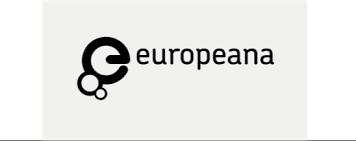

> "Take some more tea," the March Hare said to Alice, very earnestly. "I've had nothing yet," Alice replied in an offended tone, "so I can't take more." "You mean you can't take less," said the Hatter: "it's very easy to take more than nothing." (Lewis Carrol, in Alice in Wonderland)

What info can we find about teapots on Europeana and what can we do with it? This project will experiment with different possibilities of extracting and using metadata to gain insights on **teapots** in particular, that are in the total collection of Europeana. Below I will give an example of a record and what metadata I want to retrieve.





**An Example**

If one makes a search on Europeana for teapots, one can find several results for teapots in the collection. Today, for the search 'teapot', one can find 2,111 results:

Search link: https://www.europeana.eu/en/search?page=1&view=grid&query=teapot

At the level of an object in the collection, the teapot below can be an example to check which metadata could be of use:

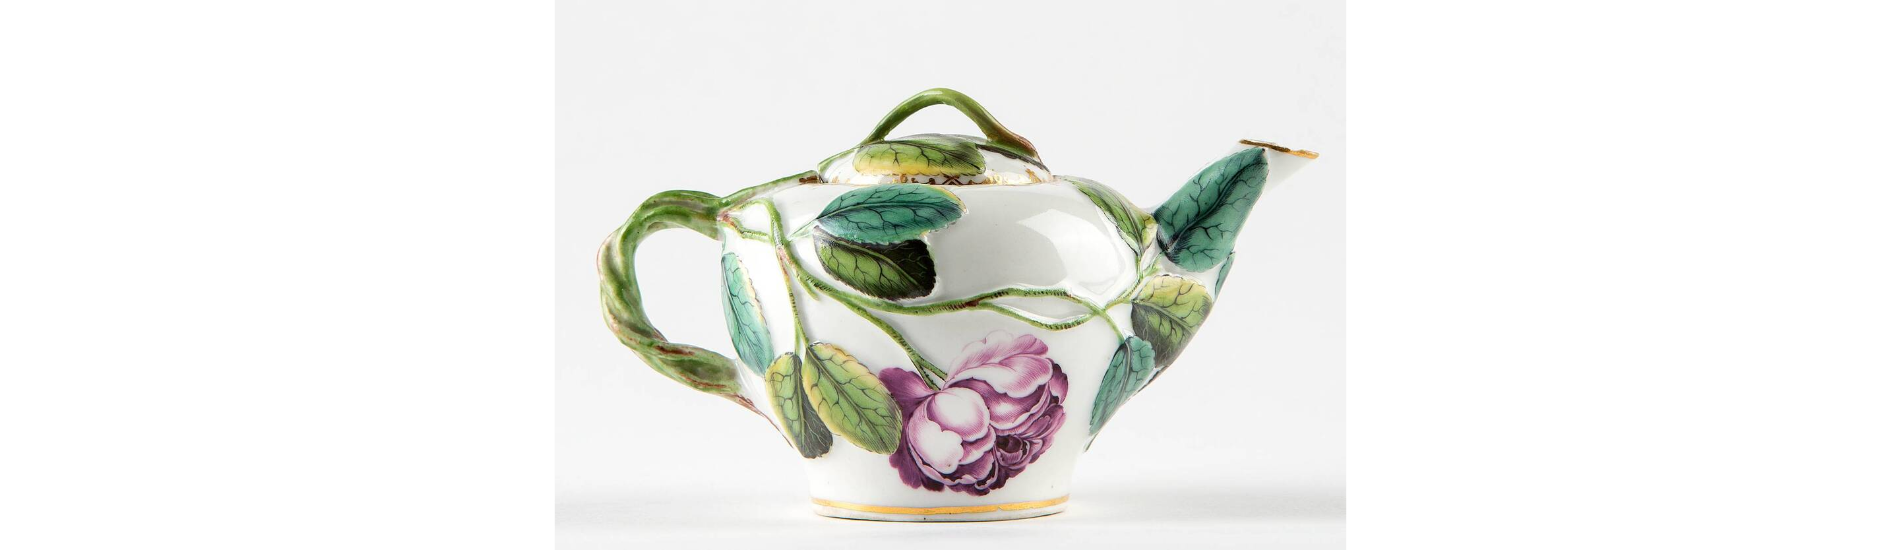

record link:
https://www.europeana.eu/nl/item/15514/KE_10412_4

If we visit the record page, one can find the metadata listed below for the item. This list gives a good overview of what metadata we can start looking for regarding teapots.

```
Medewerkers
Gmandtner, Joseph  Kaiserliche Porzellanmanufaktur Wien
Uitgever
MAK – Museum of Applied Arts, Vienna
Type object
jar, jug (used as drinking-vessel)
Medium
porcelain  glazed  painted  gold decoration Porselein
Deelnemende erfgoedorganisatie
MAK – Museum of Applied Arts
Informatienetwerk
Kulturpool
Rechtenstatus van de media in dit record (tenzij anders vermeld)
http://rightsstatements.org/vocab/InC/1.0/
Rechten
In Copyright
Tijdsperiode
1751-1775
Plaatsen
Wien
Huidige locatie
Wien
Herkomst
purchase (1984-07-18)
Identificatie
KE 10412-4  KE 10412-4
Mate
Durchmesser: 13.3 cm  Höhe: 6.8 cm  Höhe: 7.8 cm  Gewicht: 136 g
Taal
de  deu
Is onderdeel van
Glass and Ceramics Collection (Department)  ceramics collection (Collection)
Land
Austria
Naam van de collectie
15514_Ag_AT_Kulturpool_MAK
Voor het eerst gepubliceerd op Europeana
2020-04-29T16:47:56.156Z
Laatste keer bijgewerkt door deelnemende erfgoedorganisatie
2023-02-13T15:37:53.434Z
```
In the next steps we will focus on how to retrieve this data for all possible records in an efficient way. Practically speaking, these metadata fields will have a different field name under which they can be extracted. A big part of the challenge will be to adjust the script properly to find these fields.

Nevertheless, there is more metadata hidden behind the curtains of the user platform. Later we will see that data is structured with help of the [Dublin Core](https://www.dublincore.org/) (DC) metadata standards, and/or with helm of [the European Data Model](https://pro.europeana.eu/page/edm-documentation) (EDM). These will have to be further explored along the way.


# 1.2: Retrieving a set of records with Europeana's API key


First of all one should make an account on the Europeana platform to receive an API-Key. This key is necessary, because once implemented into a script, it gives acces and permission to download specific metadata from specific records. In the following parts we will develop that script to fetch record data via the API key.

More info about Europeana and the usage of API's can be found here: https://pro.europeana.eu/page/apis

specifically, the documentation about [Record API](https://europeana.atlassian.net/wiki/spaces/EF/pages/2385674279/Record+API+Documentation) and [Search API](https://europeana.atlassian.net/wiki/spaces/EF/pages/2385739812/Search+API+Documentation) are relevant for this project. In chapter four I will also try to explore the [IIIF API](https://europeana.atlassian.net/wiki/spaces/EF/pages/1627914244/IIIF+APIs+Documentation).



## 1.2.1: Reaching 100 records

This part will explain how to prompt and script some code to retrieve metadata from the Europeana collection via a personal API-key, searching specifically on the query 'teapot'. Further on we will look at the search-API and record-API of Europeana. A general guide to using Europeana API's can be found [here](https://apis.europeana.eu/en). I start writing the initial script using generative AI, in this case ChatGPT.


> *Prompt (ChatGPT): I want to extract a dataset from europeana via my api-key. I want to have a search function for the query 'teapot'? I also want to know how much records I downloaded. Can you help me write the full code please? And explain each line of code? make it a csv document.*



In [ ]:
# basic code for 100 records
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # Import the requests library to make HTTP requests
import csv       # Import the csv library to save the data into a CSV file

# Define the base URL for Europeana API
base_url = "https://api.europeana.eu/record/v2/search.json"  # URL for the Europeana search API

# Your API key (replace this with your actual API key)
api_key = 'reeditaccif'  # Use your actual Europeana API key here

# Define the search query parameters
params = {
    'query': 'teapot',  # Search term for 'teapot'
    'rows': 200,         # Number of results per page (adjust as needed)
    'start': 1,          # Start at the first result
    'wskey': api_key     # Your Europeana API key
}

# Send GET request to the Europeana API
response = requests.get(base_url, params=params)  # Sends GET request to Europeana API

# Check if the request was successful
if response.status_code == 200:  # Checks if the status code of the response is 200 (OK)
    # Parse the JSON response from the API
    data = response.json()  # Converts the response into a Python dictionary

    # Extract the records from the response
    records = data.get('items', [])  # Extracts the 'items' field from the response JSON

    # Count the number of records
    num_records = len(records)  # Counts the number of records retrieved

    # Open the CSV file in write mode
    with open('teapot_results.csv', mode='w', newline='', encoding='utf-8') as file:  # Open CSV file for writing
        writer = csv.writer(file)  # Create a CSV writer object to write data to the file

        # Write header row (column names) to the CSV
        writer.writerow(['Title', 'Creator', 'Date', 'Thumbnail', 'URL'])  # Write the column headers to CSV

        # Loop through each record and write the relevant fields to the CSV
        for record in records:  # Iterate over each record in the response
            # Extract relevant fields (title, creator, date, thumbnail, and URL)
            title = record.get('title', 'No title available')  # Get the title, or a default if missing
            creator = record.get('creator', 'No creator available')  # Get the creator, or a default if missing
            date = record.get('date', 'No date available')  # Get the date, or a default if missing
            thumbnail = record.get('preview', 'No thumbnail available')  # Get the thumbnail URL, or a default if missing
            url = record.get('link', 'No URL available')  # Get the link to the record, or a default if missing

            # Write the data for each record as a row in the CSV
            writer.writerow([title, creator, date, thumbnail, url])  # Write each record as a row in the CSV

    # Print the total number of records downloaded
    print(f"Data has been written to 'teapot_results.csv'.")  # Inform the user that data was written to CSV
    print(f"Total records downloaded: {num_records}.")  # Print the total number of records downloaded

else:  # If the request was not successful (status code other than 200)
    # Handle unsuccessful request (non-200 HTTP status)
    print(f"Error: {response.status_code}")  # Print the error code (e.g., 404, 500) to help diagnose the issue



ChatGPT did a wonderfull task and wrote a script to extract metadata via the API key. At the moment this code returns 100 results from this prompt. This is not satisfactory though. How are they sorted? Which 100 records are these? and how to get more than 100 results?

## 1.2.2 : Reaching 500 records

In a next stage we want more results. A new prompt is send to achieve this:


> *prompt (ChatGPT): Why do I only get 100 results? write full code again to get all results?*



In [ ]:
# basic code: reaching 500 records
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # Import the 'requests' library to make HTTP requests to the Europeana API
import csv       # Import the 'csv' library to save the data into a CSV file
import time      # Import the 'time' library to use 'sleep' for pausing between requests

# Define the base URL for the Europeana API search endpoint
base_url = "https://api.europeana.eu/record/v2/search.json"  # Europeana API search URL

# Your Europeana API key (replace with your actual API key)
api_key = 'reeditaccif'  # Replace 'your_api_key_here' with your actual Europeana API key

# Define the search query parameters
params = {
    'query': 'teapot',  # Search term to query Europeana (here we are searching for 'teapot')
    'rows': 200,         # The maximum number of results to retrieve per request (200 is the max allowed by Europeana API)
    'start': 1,          # The starting index for the first set of results (start from the first record)
    'wskey': api_key     # API key for authentication
}

# Define a function to fetch and write data to CSV
def fetch_and_write_to_csv():
    # Open a CSV file 'teapot_results.csv' in write mode ('w'), with UTF-8 encoding to handle special characters
    with open('teapot_results.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object that will write data to the file

        # Write the header row (column names) to the CSV file
        writer.writerow(['Title', 'Creator', 'Date', 'Thumbnail', 'URL'])

        start = 1  # Initialize the 'start' parameter to begin fetching from the first record
        total_records = 0  # Initialize a counter to keep track of the total number of records downloaded

        # Start an infinite loop to keep fetching records until no more records are available
        while True:
            params['start'] = start  # Update the 'start' parameter to fetch the next set of results (pagination)

            # Send a GET request to the Europeana API with the defined parameters
            response = requests.get(base_url, params=params)

            # Check if the request was successful (status code 200 means OK)
            if response.status_code == 200:
                data = response.json()  # Parse the JSON response into a Python dictionary

                # Extract the 'items' field, which contains the actual records from the response data
                records = data.get('items', [])

                # If no records are returned (empty list), it means we've reached the end, so break the loop
                if not records:
                    break

                # Loop through each record in the 'items' field
                for record in records:
                    # Extract relevant fields from the record (with default values if fields are missing)
                    title = record.get('title', 'No title available')  # Extract the title of the record (or a default value)
                    creator = record.get('creator', 'No creator available')  # Extract the creator (or a default value)
                    date = record.get('date', 'No date available')  # Extract the date (or a default value)
                    thumbnail = record.get('preview', 'No thumbnail available')  # Extract the thumbnail URL (or a default value)
                    url = record.get('link', 'No URL available')  # Extract the link to the record (or a default value)

                    # Write the extracted data as a row in the CSV file
                    writer.writerow([title, creator, date, thumbnail, url])

                # Count the number of records downloaded in the current batch
                num_records = len(records)
                total_records += num_records  # Update the total record count

                # Print a message indicating how many records were downloaded in the current batch
                print(f"Downloaded {num_records} records (Total: {total_records} records so far).")

                # Pause for 1 second before making the next request to avoid hitting the rate limit
                time.sleep(1)

                # Update the 'start' parameter to fetch the next batch of 200 records
                start += 200  # Move to the next batch of records (increment by 200)

            else:  # If the request was not successful (status code other than 200)
                # Print the error code (e.g., 404, 500) to help diagnose the issue
                print(f"Error: {response.status_code}")
                break  # Exit the loop if the request fails

        # After all records are downloaded, print the total number of records downloaded
        print(f"Total records downloaded: {total_records}.")

# Call the function to fetch and write the data to CSV
fetch_and_write_to_csv()


This code results in an 'error: 400' and 'only' 500 records. This is already significantly more than earlier results, but for research purpose I want to expand this to all records. We need to solve the error:400. If I look up the problem I read about it being about too many requests in a short time (rate limiting).

## 1.2.3: Reaching 1000 records

To get past the rate limiting and server overload, I send a new prompt to ChatGPT. In the prompt I add the results of my script and ask how to solve this problem:

> *Prompt: "Downloaded 100 records (Total: 100 records so far).Downloaded 100 records (Total: 200 records so far).
Downloaded 100 records (Total: 300 records so far).
Downloaded 100 records (Total: 400 records so far).
Downloaded 100 records (Total: 500 records so far).
Error: 400
Total records downloaded: 500.
how do I solve this problem? Write full code please, explain each step, please"*

Unfortunatly, this prompt (and many others) did not work and became a dead end. I tried several of the scripts created by ChatGPT without succes. I thought the problem behind the error might be an overloading of the server. Therefore, I asked to rethink the script with a new prompt:

> *prompt: i still have the same problem, can you rethink how to download more than 500 records with the query 'teapot' without overloading europeana server with my apikey?*

I came to understand that the problem could lie in the pagination and cursor use to read different pages of records and to download these properly without overloading the server by sending out too many requests, or by sending them out too fast. I integrated this in the next prompt for ChatGPT.


> *prompt: rewrite code to accept api key and list of queries (teapot in this case), and write a script to fetch more than 500 records using pagination and cursors? write full code, explain each line please*




In [ ]:
# basic code: reaching 1000 records
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # Import the requests library to make HTTP requests to the Europeana API
import csv       # Import the csv library to save the data into a CSV file
import time      # Import the time library to use 'sleep' for pausing between requests

# Define the base URL for the Europeana API search endpoint
base_url = "https://api.europeana.eu/record/v2/search.json"  # Europeana API search URL

# Your Europeana API key (replace with your actual API key)
api_key = 'reeditaccif'  # Replace 'your_api_key_here' with your actual Europeana API key

# Define the search query parameters
params = {
    'query': 'teapot',  # Search term to query Europeana (here we are searching for 'teapot')
    'rows': 100,         # The maximum number of results to retrieve per request (100 is a safer number)
    'start': 1,          # The starting index for the first set of results (start from the first record)
    'wskey': api_key     # API key for authentication
}

# Define the maximum number of retries
max_retries = 5  # Define the number of retries before quitting

# Define a function to fetch and write data to CSV
def fetch_and_write_to_csv():
    retry_count = 0  # Initialize retry_count here, before the loop

    # Open a CSV file 'teapot_results.csv' in write mode ('w'), with UTF-8 encoding to handle special characters
    with open('teapot_results.csv', mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object that will write data to the file

        # Write the header row (column names) to the CSV file
        writer.writerow(['Title', 'Creator', 'Date', 'Thumbnail', 'URL'])

        start = 1  # Initialize the 'start' parameter to begin fetching from the first record
        total_records = 0  # Initialize a counter to keep track of the total number of records downloaded

        # Start an infinite loop to keep fetching records until no more records are available
        while True:
            params['start'] = start  # Update the 'start' parameter to fetch the next set of results (pagination)

            # Send a GET request to the Europeana API with the defined parameters
            response = requests.get(base_url, params=params)

            # Check if the request was successful (status code 200 means OK)
            if response.status_code == 200:
                data = response.json()  # Parse the JSON response into a Python dictionary

                # Extract the 'items' field, which contains the actual records from the response data
                records = data.get('items', [])

                # If no records are returned (empty list), it means we've reached the end, so break the loop
                if not records:
                    break

                # Loop through each record in the 'items' field
                for record in records:
                    # Extract relevant fields from the record (with default values if fields are missing)
                    title = record.get('title', 'No title available')  # Extract the title of the record (or a default value)
                    creator = record.get('creator', 'No creator available')  # Extract the creator (or a default value)
                    date = record.get('date', 'No date available')  # Extract the date (or a default value)
                    thumbnail = record.get('preview', 'No thumbnail available')  # Extract the thumbnail URL (or a default value)
                    url = record.get('link', 'No URL available')  # Extract the link to the record (or a default value)

                    # Write the extracted data as a row in the CSV file
                    writer.writerow([title, creator, date, thumbnail, url])

                # Count the number of records downloaded in the current batch
                num_records = len(records)
                total_records += num_records  # Update the total record count

                # Print a message indicating how many records were downloaded in the current batch
                print(f"Downloaded {num_records} records (Total: {total_records} records so far).")

                # Increase the delay to avoid hitting rate limits
                time.sleep(3)  # Increase this value if you hit rate limits

                # Update the 'start' parameter to fetch the next batch of 100 records
                start += 100  # Move to the next batch of records (increment by 100)

            # Handle rate limit issue with error code 400
            elif response.status_code == 400:
                print("Error: Rate limit reached. Waiting for 1 second before retrying...")
                time.sleep(1)  # Pause for 1 second before retrying the request
                retry_count += 1  # Increment the retry counter

                # If max retries reached, exit the loop
                if retry_count >= max_retries:
                    print("Maximum retry limit reached. Exiting the script.")
                    break
                continue

            # If the request fails for other reasons, print the error and break the loop
            else:
                print(f"Error: {response.status_code}")
                break

        # After all records are downloaded, print the total number of records downloaded
        print(f"Total records downloaded: {total_records}.")

# Call the function to fetch and write the data to CSV
fetch_and_write_to_csv()


## 1.2.4: Reaching ALL records

This seemed to be working better, but there is a problem if we want to download more than 1000 records from Europeana via the API-key: the limit is reached after 1000 records. Next I will find a way to get around this problem: the solution can again be found in page handling and the use of a cursor. I send a new prompt.

> *Prompt (ChatGPT): problem:
Limit reached: 1000 records.
Process completed. 1000 records fetched and metadata saved.
CSV file saved at: downloads/1743708082/metadata.csv
rewrite all code again so i can fetch more than 1000 records please*



In [ ]:
# basic code: reaching all records
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # For making HTTP requests to the Europeana API
import csv       # For writing fetched metadata to CSV files
import os        # For creating directories and handling file paths
import time      # For adding delays between requests (rate limiting)
from urllib.parse import quote_plus  # For URL encoding to ensure safe query parameters

def fetch_europeana_metadata(api_key, queries, rows=100, limit=5000):
    """
    Fetch metadata from Europeana API using search queries, and save it to a CSV file.
    Supports pagination to fetch more than 1000 records.
    """
    # Step 1: Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'  # Directory named with a timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Step 2: Initialize variables to track progress
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)

    # Step 3: Define the CSV headers
    headers = ['Title', 'Creator', 'Date', 'Description', 'Language', 'Country', 'Link']

    # Step 4: Define the file path where the CSV will be stored
    csv_file_path = os.path.join(directory, 'metadata.csv')  # Path to the CSV file

    # Step 5: Open the CSV file and write the headers
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object
        writer.writerow(headers)  # Write the header row to the CSV file

    # Step 6: Combine all search queries into a single query using OR
    combined_query = ' OR '.join(queries)  # Combine queries with 'OR'

    # Step 7: Loop until the desired limit of records is fetched
    while fetched_records < limit:
        # Step 8: Construct the API request URL with the necessary parameters
        url = f'http://www.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

        try:
            # Step 9: Send the request to Europeana API
            response = requests.get(url)  # Make the HTTP GET request to Europeana
            response.raise_for_status()  # Check for any HTTP errors (e.g., 4xx, 5xx)

            # Step 10: Parse the JSON response
            data = response.json()  # Convert the response content into a Python dictionary

            # Step 11: Check if the request was successful
            if not data.get('success', True):  # Check if the API responded with success
                print(f"Error: {data.get('error', 'Unknown error')}")
                break  # Exit if there was an error in the response

            # Step 12: Ensure the response contains 'items' field
            if 'items' not in data:
                print("Error: 'items' key not found in response.")
                break  # Exit if 'items' is not in the response

            # Step 13: Loop through each record and extract relevant metadata
            for record in data['items']:
                metadata = {
                    'Title': record.get('title', 'N/A'),
                    'Creator': record.get('creator', 'N/A'),
                    'Date': record.get('date', 'N/A'),
                    'Description': record.get('description', 'N/A'),
                    'Language': record.get('language', 'N/A'),
                    'Country': record.get('country', 'N/A'),
                    'Link': record.get('link', 'N/A')
                }

                # Step 14: Append the record data to the CSV file
                with open(csv_file_path, 'a', newline='', encoding='utf-8') as file:
                    writer = csv.writer(file)  # Create a new CSV writer object in append mode
                    writer.writerow([metadata['Title'], metadata['Creator'], metadata['Date'],
                                    metadata['Description'], metadata['Language'],
                                    metadata['Country'], metadata['Link']])

                # Step 15: Update the number of records fetched
                fetched_records += 1  # Increment the counter of fetched records

                # Step 16: Check if we have reached the limit and exit the loop if so
                if fetched_records >= limit:
                    print(f"Limit reached: {limit} records.")
                    break  # Exit the inner loop

            # Step 17: Check if there is another page of results to fetch (pagination)
            if 'nextCursor' in data:
                cursor = data['nextCursor']  # Update the cursor for the next page of results
                print(f"Fetched {fetched_records} records, continuing to next cursor.")
            else:
                break  # Exit if there are no more pages of results

            # Step 18: Pause for 1 second before making the next request (rate limiting)
            time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

        except requests.exceptions.RequestException as e:  # Catch any request-related errors
            print(f"Request error: {e}")
            break  # Exit if there was a request error

        except Exception as e:  # Catch any other general exceptions
            print(f"An unexpected error occurred: {e}")
            break  # Exit if an unexpected error occurred

    # Step 19: Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

# Step 20: Define the API key and search queries
api_key = 'reeditaccif'  # Replace with your actual Europeana API key
queries = ['teapot']  # List of search queries (can include multiple queries)

# Step 21: Define the desired limit (number of records to fetch)
desired_limit = 5000  # Set the desired number of records to fetch (e.g., 5000)

# Step 22: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to CSV


If we look at the results of the code, we can see that the server overload or API record retrieval limitation has been overcome. The process was succesfully completed. 2551 records were fetched and the metadata was saved. A search for the query 'teapot' now gives 2551 results.

# 1.3: Expanding the number of records

The previous part of scripting resulted in 2551 records of 'teapot' in the title. Of course, these are mostly English records and results do not include records from different languages or from different countries. So this script can be further improved. How can we find more records regarding teapots in Europeana?

In the following steps we will improve on several things:

- add multiple search terms or queries (and implement an 'or' / 'and' structure for the queries)
- for example 'teapot' in different languages
- and/or with different spellings.

To do this, some extra prompts were send to expand on the previous code.

> *prompt: can you adjust the code for multiple queries like 'teapot' in english, french, german and dutch please, write full code please. I want to search for or dutch or english or german or french, so all added results, now i get the same number as before, can you fixe the code please? i want all records that have 'teapot', theepot', 'teekanne' and 'théière' into a csv document*



In [ ]:
# basic code: reaching all records + multiple queries
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # Imports the requests library for making HTTP requests.
import csv       # Imports the csv library for working with CSV files.
import os        # Imports the os library for interacting with the operating system.
import time      # Imports the time library for adding delays between requests.
from urllib.parse import quote_plus  # Imports quote_plus to URL encode the query parameters.

# Step 1: Define the function that fetches data from Europeana API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000):
    # Step 2: Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'  # Create a directory with the current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Step 3: Initialize variables to track progress
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)

    # Step 4: Define the CSV headers
    headers = [
        'Title', 'Creator', 'Date', 'Description', 'Language', 'Country', 'Link'
    ]

    # Step 5: Define the file path where the CSV will be stored
    csv_file_path = os.path.join(directory, 'metadata.csv')  # Path to the CSV file

    # Step 6: Open the CSV file and write the headers
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object
        writer.writerow(headers)  # Write the header row to the CSV file

    # Step 7: Combine all search queries into a single query using OR
    combined_query = ' OR '.join(queries)  # Join queries with 'OR' to create a combined query string
    print(f"Combined query: {combined_query}")  # Print combined query for debugging

    # Step 8: Loop until the desired limit of records is fetched
    while fetched_records < limit:
        # Step 9: Construct the API request URL with the necessary parameters
        url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

        try:
            # Step 10: Send the request to Europeana API
            response = requests.get(url)  # Make the HTTP GET request to Europeana
            response.raise_for_status()  # Check for any HTTP errors (e.g., 4xx, 5xx)

            # Step 11: Parse the JSON response
            data = response.json()  # Convert the response content into a Python dictionary

            # Step 12: Check if the request was successful
            if not data.get('success', True):  # Check if the API responded with success
                print(f"Error: {data.get('error', 'Unknown error')}")
                break  # Exit if there was an error in the response

            # Step 13: Ensure the response contains 'items' field
            if 'items' not in data:
                print("Error: 'items' key not found in response.")
                break  # Exit if 'items' is not in the response

            # Step 14: Loop through each record and extract relevant metadata
            for record in data['items']:
                metadata = {
                    'Title': record.get('title', 'N/A'),
                    'Creator': record.get('creator', 'N/A'),
                    'Date': record.get('date', 'N/A'),
                    'Description': record.get('description', 'N/A'),
                    'Language': record.get('language', 'N/A'),
                    'Country': record.get('country', 'N/A'),
                    'Link': record.get('link', 'N/A')
                }

                # Step 15: Append the record data to the CSV file
                with open(csv_file_path, 'a', newline='', encoding='utf-8') as file:
                    writer = csv.writer(file)  # Create a new CSV writer object in append mode
                    writer.writerow([metadata['Title'], metadata['Creator'], metadata['Date'],
                                    metadata['Description'], metadata['Language'],
                                    metadata['Country'], metadata['Link']])

                # Step 16: Update the number of records fetched
                fetched_records += 1  # Increment the counter of fetched records

                # Step 17: Check if we have reached the limit and exit the loop if so
                if fetched_records >= limit:
                    print(f"Limit reached: {limit} records.")
                    break  # Exit the inner loop

            # Step 18: Check if there is another page of results to fetch (pagination)
            if 'nextCursor' in data:
                cursor = data['nextCursor']  # Update the cursor for the next page of results
            else:
                break  # Exit if there are no more pages of results

            # Step 19: Pause for 1 second before making the next request (rate limiting)
            time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

        # Step 20: Error handling
        except requests.exceptions.RequestException as e:  # Catch any request-related errors
            print(f"Request error: {e}")
            break  # Exit if there was a request error

        except Exception as e:  # Catch any other general exceptions
            print(f"An unexpected error occurred: {e}")
            break  # Exit if an unexpected error occurred

    # Step 21: Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

# Step 22: Define the API key and search queries
api_key = 'reeditaccif'  # Replace with your actual Europeana API key
queries = [
    'teapot',             # English query for 'teapot'
    'theepot',            # Dutch query for 'teapot'
    'Teekanne',           # German query for 'teapot'
    'théière'             # French query for 'teapot'
]

# Step 23: Define the desired limit (number of records to fetch)
desired_limit = 5000  # Set the desired number of records to fetch (e.g., 5000)

# Step 24: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to CSV


By applying this strategy, we already get much more results related to teapot in the Europeana collection. The number of results for teapot has now increased to 4398 records. Next we will look at adding more languages and spelling variations of teapot.

## 1.3.1: Multiple languages (Teapot, Teekanne, théière...?)

In a next step I asked ChatGPT to integrate all different translations of the word teapot. This way I hope to retrieve more records from Europeana, also ones that did not make it into English translation. I copy my code and send it to ChatGPT with the prompt below. I adjusted the code to get a maximum of 25000 records (just to be sure!).

> *prompt: this is my code: can you help expand it for 'teapot' in all contemporary languages used on Europeana? write full code please?*



In [ ]:
# basic code: reaching all records + translations
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # Imports the requests library for making HTTP requests.
import csv       # Imports the csv library for working with CSV files.
import os        # Imports the os library for interacting with the operating system.
import time      # Imports the time library for adding delays between requests.
from urllib.parse import quote_plus  # Imports quote_plus to URL encode the query parameters.

# Step 1: Define the function that fetches data from Europeana API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000):
    # Step 2: Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'  # Create a directory with the current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Step 3: Initialize variables to track progress
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)

    # Step 4: Define the CSV headers
    headers = [
        'Title', 'Creator', 'Date', 'Description', 'Language', 'Country', 'Link'
    ]

    # Step 5: Define the file path where the CSV will be stored
    csv_file_path = os.path.join(directory, 'metadata.csv')  # Path to the CSV file

    # Step 6: Open the CSV file and write the headers
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object
        writer.writerow(headers)  # Write the header row to the CSV file

    # Step 7: Combine all search queries into a single query using OR
    combined_query = ' OR '.join(queries)  # Join queries with 'OR' to create a combined query string
    print(f"Combined query: {combined_query}")  # Print combined query for debugging

    # Step 8: Loop until the desired limit of records is fetched
    while fetched_records < limit:
        # Step 9: Construct the API request URL with the necessary parameters
        url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

        try:
            # Step 10: Send the request to Europeana API
            response = requests.get(url)  # Make the HTTP GET request to Europeana
            response.raise_for_status()  # Check for any HTTP errors (e.g., 4xx, 5xx)

            # Step 11: Parse the JSON response
            data = response.json()  # Convert the response content into a Python dictionary

            # Step 12: Check if the request was successful
            if not data.get('success', True):  # Check if the API responded with success
                print(f"Error: {data.get('error', 'Unknown error')}")
                break  # Exit if there was an error in the response

            # Step 13: Ensure the response contains 'items' field
            if 'items' not in data:
                print("Error: 'items' key not found in response.")
                break  # Exit if 'items' is not in the response

            # Step 14: Loop through each record and extract relevant metadata
            for record in data['items']:
                metadata = {
                    'Title': record.get('title', 'N/A'),
                    'Creator': record.get('creator', 'N/A'),
                    'Date': record.get('date', 'N/A'),
                    'Description': record.get('description', 'N/A'),
                    'Language': record.get('language', 'N/A'),
                    'Country': record.get('country', 'N/A'),
                    'Link': record.get('link', 'N/A')
                }

                # Step 15: Append the record data to the CSV file
                with open(csv_file_path, 'a', newline='', encoding='utf-8') as file:
                    writer = csv.writer(file)  # Create a new CSV writer object in append mode
                    writer.writerow([metadata['Title'], metadata['Creator'], metadata['Date'],
                                    metadata['Description'], metadata['Language'],
                                    metadata['Country'], metadata['Link']])

                # Step 16: Update the number of records fetched
                fetched_records += 1  # Increment the counter of fetched records

                # Step 17: Check if we have reached the limit and exit the loop if so
                if fetched_records >= limit:
                    print(f"Limit reached: {limit} records.")
                    break  # Exit the inner loop

            # Step 18: Check if there is another page of results to fetch (pagination)
            if 'nextCursor' in data:
                cursor = data['nextCursor']  # Update the cursor for the next page of results
            else:
                break  # Exit if there are no more pages of results

            # Step 19: Pause for 1 second before making the next request (rate limiting)
            time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

        # Step 20: Error handling
        except requests.exceptions.RequestException as e:  # Catch any request-related errors
            print(f"Request error: {e}")
            break  # Exit if there was a request error

        except Exception as e:  # Catch any other general exceptions
            print(f"An unexpected error occurred: {e}")
            break  # Exit if an unexpected error occurred

    # Step 21: Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

# Step 22: Define the API key and search queries
api_key = 'reeditaccif'  # Replace with your actual Europeana API key
queries = [
    'teapot',             # English query for 'teapot'
    'theepot',            # Dutch query for 'teapot'
    'Teekanne',           # German query for 'teapot'
    'théière',            # French query for 'teapot'
    'tetera',             # Spanish query for 'teapot'
    'teiera',             # Italian query for 'teapot'
    'čajnik',             # Slovenian query for 'teapot'
    'чайник',             # Russian query for 'teapot'
    'pijača',             # Croatian query for 'teapot'
    'teekanne',           # Swedish query for 'teapot'
    'tetera',             # Catalan query for 'teapot'
    'teiera',             # Portuguese query for 'teapot'
    'teiera',             # Romanian query for 'teapot'
    '茶壺',               # Chinese query for 'teapot'
    'ポット',              # Japanese query for 'teapot'
    '주전자',             # Korean query for 'teapot'
    'teiera',             # Lithuanian query for 'teapot'
    'чайник',             # Ukrainian query for 'teapot'
    'kettle',             # English (alternative term)
    'kettle',             # Norwegian query for 'teapot'
    'чашка',              # Serbian query for 'teapot'
    'teekanne',           # Finnish query for 'teapot'
    'tetero',             # Albanian query for 'teapot'
    'cafetiera',          # Hungarian query for 'teapot'
    'pohár',              # Czech query for 'teapot'
    'челек',              # Bulgarian query for 'teapot'
    'teiere',             # Danish query for 'teapot'
    'tazzina',            # Maltese query for 'teapot'
    'tetero',             # Bosnian query for 'teapot'
    # Additional Languages (added for full spectrum)
    'teiere',             # Dutch (alternative)
    'kettle',             # Icelandic query for 'teapot'
    'teekanne',           # Norwegian query for 'teapot'
    'чајник',             # Macedonian query for 'teapot'
    'teiera',             # Latvian query for 'teapot'
    'keittokauha',        # Finnish (alternative term for kettle)
    'cerámica',           # Galician query for 'teapot'
    'кочан',              # Georgian query for 'teapot'
    'čajnik',             # Serbian query for 'teapot'
    'кувшин',             # Armenian query for 'teapot'
]

# Step 23: Define the desired limit (number of records to fetch)
desired_limit = 100000  # Set the desired number of records to fetch (e.g., 5000)

# Step 24: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to CSV


Here we encountered a **520 Server Error** when making the request to the Europeana API. I asked ChatGPT what this means. It gave as response that a 520 error typically indicates an issue with the server, often related to the query being too large or complex.
Therefore I ask ChatGPT via a new prompt to optimalize the list of languages and translations to avoid this error. This is done with the help of a dictionary and deleting duplicates.

> *Prompt: (copy of earlier code) + error 520. Write this more efficiently please.
prompt: the combined query is too long, can we work around it? write full code.*

The solution here lies in separating the query into chunks, which can be processed individually.

Another important step here is to clean up some of the languages and translation of words. Some suggestions of the AI are not usefull, for example words related to coffee (cafee) or related to ceramics (Ceramica). These would result in more noise in the dataset. There would be too many results and from those results many might not even be teapots.

In [ ]:
# basic code: reaching all records + all translations adjusted
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # For making HTTP requests
import csv       # For working with CSV files
import os        # For interacting with the file system
import time      # For adding delays between requests
from urllib.parse import quote_plus  # For URL encoding

# Step 1: Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check for HTTP errors
            if response.status_code == 520:
                raise requests.exceptions.RequestException("Error 520: Server error")
            return response  # Return the response if successful
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt  # Exponential backoff
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")
    return None  # Return None if all retries failed

# Step 2: Define the function that fetches data from Europeana API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000, chunk_size=10):
    # Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'  # Create a directory with the current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Initialize variables to track progress
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)

    # Define the CSV headers
    headers = ['Title', 'Creator', 'Date', 'Description', 'Language', 'Country', 'Link']

    # Define the file path where the CSV will be stored
    csv_file_path = os.path.join(directory, 'metadata.csv')  # Path to the CSV file

    # Open the CSV file and write the headers
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object
        writer.writerow(headers)  # Write the header row to the CSV file

    # Loop through the queries in smaller chunks
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Get a chunk of queries (e.g., 10 terms at a time)
        combined_query = ' OR '.join(query_chunk)  # Combine the queries for the chunk
        print(f"Processing query chunk: {combined_query}")  # Print the chunk for debugging

        # Loop until the desired limit of records is fetched
        while fetched_records < limit:
            # Construct the API request URL with the necessary parameters
            url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                # Use the send_request function to handle retries
                response = send_request(url)
                if response is None:  # If the request failed after retries, stop the loop
                    break

                # Parse the JSON response
                data = response.json()

                # Check if the request was successful
                if not data.get('success', True):
                    print(f"Error: {data.get('error', 'Unknown error')}")
                    break  # Exit if there was an error in the response

                # Ensure the response contains 'items' field
                if 'items' not in data:
                    print("Error: 'items' key not found in response.")
                    break  # Exit if 'items' is not in the response

                # Loop through each record and extract relevant metadata
                for record in data['items']:
                    metadata = {
                        'Title': record.get('title', 'N/A'),
                        'Creator': record.get('creator', 'N/A'),
                        'Date': record.get('date', 'N/A'),
                        'Description': record.get('description', 'N/A'),
                        'Language': record.get('language', 'N/A'),
                        'Country': record.get('country', 'N/A'),
                        'Link': record.get('link', 'N/A')
                    }

                    # Append the record data to the CSV file
                    with open(csv_file_path, 'a', newline='', encoding='utf-8') as file:
                        writer = csv.writer(file)  # Create a new CSV writer object in append mode
                        writer.writerow([metadata['Title'], metadata['Creator'], metadata['Date'],
                                        metadata['Description'], metadata['Language'],
                                        metadata['Country'], metadata['Link']])

                    # Update the number of records fetched
                    fetched_records += 1

                    # Check if we have reached the limit and exit the loop if so
                    if fetched_records >= limit:
                        print(f"Limit reached: {limit} records.")
                        break  # Exit the inner loop

                # Check if there is another page of results to fetch (pagination)
                if 'nextCursor' in data:
                    cursor = data['nextCursor']  # Update the cursor for the next page of results
                else:
                    break  # Exit if there are no more pages of results

                # Pause for 1 second before making the next request (rate limiting)
                time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

            except requests.exceptions.RequestException as e:  # Catch any request-related errors
                print(f"Request error: {e}")
                break  # Exit if there was a request error

            except Exception as e:  # Catch any other general exceptions
                print(f"An unexpected error occurred: {e}")
                break  # Exit if an unexpected error occurred

    # Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

# Step 3: Define the API key
api_key = 'reeditaccif'  # Replace with your actual Europeana API key

# Step 4: Define the translations for 'teapot' in various languages
teapot_translations = {
    'en': ['teapot', 'kettle'],  # English
    'nl': ['theepot'],            # Dutch
    'de': ['Teekanne'],           # German
    'fr': ['théière'],            # French
    'es': ['tetera'],             # Spanish
    'it': ['teiera'],             # Italian
    'sl': ['čajnik'],             # Slovenian
    'ru': ['чайник'],             # Russian
    'hr': ['pijača'],             # Croatian
    'sv': ['teekanne'],           # Swedish
    'ca': ['tetera'],             # Catalan
    'pt': ['teiera'],             # Portuguese
    'ro': ['teiera'],             # Romanian
    'zh': ['茶壺'],               # Chinese
    'ja': ['ポット'],              # Japanese
    'ko': ['주전자'],             # Korean
    'lt': ['teiera'],             # Lithuanian
    'uk': ['чайник'],             # Ukrainian
    'no': ['kettle'],             # Norwegian
    'sr': ['чашка'],              # Serbian
    'fi': ['teekanne', 'keittokauha'],  # Finnish (two variants)
    'sq': ['tetero'],             # Albanian
    'cs': ['pohár'],              # Czech
    'bg': ['челек'],              # Bulgarian
    'da': ['teiere'],             # Danish
    'mt': ['tazzina'],            # Maltese
    'bs': ['tetero'],             # Bosnian
    'is': ['kettle'],             # Icelandic
    'mk': ['чајник'],             # Macedonian
    'lv': ['teiera'],             # Latvian
    'ka': ['кочан'],              # Georgian
    'hy': ['кувшин']              # Armenian
}

# Step 5: Convert the dictionary into a flat list of unique queries
queries = [term for terms in teapot_translations.values() for term in terms]

# Step 6: Define the desired limit (number of records to fetch)
desired_limit = 50000  # Set the desired number of records to fetch (e.g., 5000)

# Step 7: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to CSV


## 1.3.2: Spelling (Teapot or Tea pot?)

In this step we will account for different ways of spelling teapot in different languages. To do this, we can add some open character (? and *) to account for any possible extra or missing spaces or other forms or spelling for these languages. In Python these are so-called wildcards. More information on wildcards in Python can be found [here](https://www.educative.io/answers/how-to-implement-wildcards-in-python).

> example:   'tea*pot',  'th?i?re', '?eekanne'...

It is important to note that we need te look out for inclusions that are too big and might mess up the data.

> example: 'tea*pot' can refer to 'teapot', 'tea pot', but also to 'teak pot', which could be a completely different item than what we were initially looking for.

Most of these decisions require a risk analysis, optionally through trial-and-error.

> *prompt: (I copied the list of languages and added) reduce to 4 variations per language maximum (less allowed if not usefull), then reduce for duplicates, than write new list please. now rewrite this with wildcards to make more efficient. No asterix at end of a word please. Take away all non european languages*

I went over all variations of teapot in different languages and looked up the queries in the Europeana collection to see if I get any results. If I do not, or if I get too many, I delete the variation of wildcard, because this adds too much noise to the dataset.

> example: in the case of tee*pot, I get only four results on Europeana. This is not usefull as two of the results are irrelevant.

> example: in the case of '?e*anne', I get 3,049,560 results. All results for Cezanne (painter) are also included. Therefore I deleted this variation from the script.

In [ ]:
# basic code: reaching all records + translations adjusted + spelling
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme


import requests  # For making HTTP requests
import csv       # For working with CSV files
import os        # For interacting with the file system
import time      # For adding delays between requests
from urllib.parse import quote_plus  # For URL encoding

# Step 1: Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check for HTTP errors
            if response.status_code == 520:
                raise requests.exceptions.RequestException("Error 520: Server error")
            return response  # Return the response if successful
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt  # Exponential backoff
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")
    return None  # Return None if all retries failed

# Step 2: Define the function that fetches data from Europeana API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000, chunk_size=10):
    # Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'  # Create a directory with the current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Initialize variables to track progress
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)

    # Define the CSV headers
    headers = ['Title', 'Creator', 'Date', 'Description', 'Language', 'Country', 'Link']

    # Define the file path where the CSV will be stored
    csv_file_path = os.path.join(directory, 'metadata.csv')  # Path to the CSV file

    # Open the CSV file and write the headers
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)  # Create a CSV writer object
        writer.writerow(headers)  # Write the header row to the CSV file

    # Loop through the queries in smaller chunks
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Get a chunk of queries (e.g., 10 terms at a time)
        combined_query = ' OR '.join(query_chunk)  # Combine the queries for the chunk
        print(f"Processing query chunk: {combined_query}")  # Print the chunk for debugging

        # Loop until the desired limit of records is fetched
        while fetched_records < limit:
            # Construct the API request URL with the necessary parameters
            url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                # Use the send_request function to handle retries
                response = send_request(url)
                if response is None:  # If the request failed after retries, stop the loop
                    break

                # Parse the JSON response
                data = response.json()

                # Check if the request was successful
                if not data.get('success', True):
                    print(f"Error: {data.get('error', 'Unknown error')}")
                    break  # Exit if there was an error in the response

                # Ensure the response contains 'items' field
                if 'items' not in data:
                    print("Error: 'items' key not found in response.")
                    break  # Exit if 'items' is not in the response

                # Loop through each record and extract relevant metadata
                for record in data['items']:
                    metadata = {
                        'Title': record.get('title', 'N/A'),
                        'Creator': record.get('creator', 'N/A'),
                        'Date': record.get('date', 'N/A'),
                        'Description': record.get('description', 'N/A'),
                        'Language': record.get('language', 'N/A'),
                        'Country': record.get('country', 'N/A'),
                        'Link': record.get('link', 'N/A')
                    }

                    # Append the record data to the CSV file
                    with open(csv_file_path, 'a', newline='', encoding='utf-8') as file:
                        writer = csv.writer(file)  # Create a new CSV writer object in append mode
                        writer.writerow([metadata['Title'], metadata['Creator'], metadata['Date'],
                                        metadata['Description'], metadata['Language'],
                                        metadata['Country'], metadata['Link']])

                    # Update the number of records fetched
                    fetched_records += 1

                    # Check if we have reached the limit and exit the loop if so
                    if fetched_records >= limit:
                        print(f"Limit reached: {limit} records.")
                        break  # Exit the inner loop

                # Check if there is another page of results to fetch (pagination)
                if 'nextCursor' in data:
                    cursor = data['nextCursor']  # Update the cursor for the next page of results
                else:
                    break  # Exit if there are no more pages of results

                # Pause for 1 second before making the next request (rate limiting)
                time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

            except requests.exceptions.RequestException as e:  # Catch any request-related errors
                print(f"Request error: {e}")
                break  # Exit if there was a request error

            except Exception as e:  # Catch any other general exceptions
                print(f"An unexpected error occurred: {e}")
                break  # Exit if an unexpected error occurred

    # Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

# Step 3: Define the API key
api_key = 'reeditaccif'  # Replace with your actual Europeana API key

# Step 4: Define the translations for 'teapot' in various languages
teapot_translations = {
    'en': ['teapot', 't*pot'],            # English
    'nl': ['theepot', 'teepot'],           # Dutch
    'de': ['teekanne', '*eekanne'],        # German
    'fr': ['théière', 'th?i?re'],        # French
    'es': ['tetera'],          # Spanish
    'it': ['teiera'],          # Italian
    'sl': ['čajnik', 'č*ajnik'],          # Slovenian
    'sv': ['teekanne', 'te*k*anne'],      # Swedish
    'ca': ['tetera'],          # Catalan
    'pt': ['teiera', 'te*iera'],          # Portuguese
    'ro': ['teiera'],          # Romanian
    'lt': ['teiera'],          # Lithuanian
    'uk': ['чайник'],           # Ukrainian
    'no': ['kettle'],          # Norwegian
    'sr': ['čajnik', 'č*ajnik'],          # Serbian
    'fi': ['teekanne', 'te?kanne'],       # Finnish
    'da': ['teiere', 't*eiere'],          # Danish
    'is': ['kettle'],           # Icelandic
    'lv': ['teiera'],          # Latvian
    'pl': ['czajnik', 'c*ajnik'],         # Polish
}

# Step 5: Convert the dictionary into a flat list of unique queries
queries = [term for terms in teapot_translations.values() for term in terms]

# Step 6: Define the desired limit (number of records to fetch)
desired_limit = 10000  # Set the desired number of records to fetch (e.g., 5000)

# Step 7: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to CSV


Hurraaay! With all these strategies combined we get around 9546 records. I later realized that duplicates are present in the list of records due to this script. This will be fixed in further code. In the next part I will also investigate how to retrieve metadata correctly for all fields, en in particular learn how to choose what I want.

# 1.4: Selecting the preferred metadata

## 1.4.1: First results

This part will show how to acces specific metadata from the records. At the moment this script has provided the following fields:    

```
  'Title': record.get('title', 'N/A'),
  'Creator': record.get('creator', 'N/A'),
  'Date': record.get('date', 'N/A'),
  'Description': record.get('description', 'N/A'),
  'Language': record.get('language', 'N/A'),
  'Country': record.get('country', 'N/A'),
  'Link': record.get('link', 'N/A')
```

In the next step we will change this to all metadata from a record.

For debugging purposes we limit the number of retrievable records to 100 instead of all records. Otherwise the running of the script would take too long and would be too intensive. Here we only want to check IF we scrape the correct metadata fields. In a later step we can adjust the script to return all records with the preferred metadata fields.



## 1.4.2: All metadata fields

I asked ChatGPT with this prompt to retrieve all metadata from a record. I looked further into the documentation about Europeana API's and switched focus for the AI on the [search](https://europeana.atlassian.net/wiki/spaces/EF/pages/2385739812/Search+API+Documentation) and [record](https://europeana.atlassian.net/wiki/spaces/EF/pages/2385674279/Record+API+Documentation) API.

> *prompt : how to retrieve all metadata from the records? use the record API of Europeana. write full code again please*



In [ ]:
# @title
# basic code: reaching all records + translations adjusted
# + spelling + all metadata
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme


import requests  # For making HTTP requests
import csv       # For working with CSV files
import os        # For interacting with the file system
import time      # For adding delays between requests
from urllib.parse import quote_plus  # For URL encoding
from google.colab import files  # For downloading files in Colab

# Step 1: Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check for HTTP errors
            return response  # Return the response if successful
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt  # Exponential backoff
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")
    return None  # Return None if all retries failed

# Step 2: Define the function that fetches data from Europeana API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000, chunk_size=10):
    # Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'  # Create a directory with the current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Initialize variables to track progress
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)

    # Define the file path where the CSV will be stored
    csv_file_path = os.path.join(directory, 'metadata.csv')  # Path to the CSV file

    # Initialize an empty list to store all the metadata
    all_metadata = []

    # Define the header for the CSV file
    csv_header = ['Title', 'Creator', 'Date', 'Description', 'Language', 'Country', 'Link']

    # Loop through the queries in smaller chunks
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Get a chunk of queries (e.g., 10 terms at a time)
        combined_query = ' OR '.join(query_chunk)  # Combine the queries for the chunk
        print(f"Processing query chunk: {combined_query}")  # Print the chunk for debugging

        # Loop until the desired limit of records is fetched
        while fetched_records < limit:
            # Construct the API request URL with the necessary parameters
            url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                # Use the send_request function to handle retries
                response = send_request(url)
                if response is None:  # If the request failed after retries, stop the loop
                    break

                # Parse the JSON response
                data = response.json()

                # Check if the request was successful
                if not data.get('success', True):
                    print(f"Error: {data.get('error', 'Unknown error')}")
                    break  # Exit if there was an error in the response

                # Ensure the response contains 'items' field
                if 'items' not in data:
                    print("Error: 'items' key not found in response.")
                    break  # Exit if 'items' is not in the response

                # Loop through each record and extract relevant metadata
                for record in data['items']:
                    metadata = {
                        'Title': record.get('title', 'N/A'),
                        'Creator': record.get('creator', 'N/A'),
                        'Date': record.get('date', 'N/A'),
                        'Description': record.get('description', 'N/A'),
                        'Language': record.get('language', 'N/A'),
                        'Country': record.get('country', 'N/A'),
                        'Link': record.get('link', 'N/A')
                    }

                    # Add the record to the list of all metadata
                    all_metadata.append(metadata)

                    # Update the number of records fetched
                    fetched_records += 1

                    # Check if we have reached the limit and exit the loop if so
                    if fetched_records >= limit:
                        print(f"Limit reached: {limit} records.")
                        break  # Exit the inner loop

                # Check if there is another page of results to fetch (pagination)
                if 'nextCursor' in data:
                    cursor = data['nextCursor']  # Update the cursor for the next page of results
                else:
                    break  # Exit if there are no more pages of results

                # Pause for 1 second before making the next request (rate limiting)
                time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

            except requests.exceptions.RequestException as e:  # Catch any request-related errors
                print(f"Request error: {e}")
                break  # Exit if there was a request error

            except Exception as e:  # Catch any other general exceptions
                print(f"An unexpected error occurred: {e}")
                break  # Exit if an unexpected error occurred

    # Save the collected metadata into a CSV file
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=csv_header)
        writer.writeheader()  # Write the header
        writer.writerows(all_metadata)  # Write all the records

    # Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

    # Step to download the CSV file from Colab
    files.download(csv_file_path)  # Download the CSV file

# Step 3: Define the API key
api_key = 'reeditaccif'  # Replace with your actual Europeana API key

# Step 4: Define the translations for 'teapot' in various languages
teapot_translations = {
    'en': ['teapot', 't*pot'],            # English
    'nl': ['theepot', 'teepot'],           # Dutch
    'de': ['teekanne', '*eekanne'],        # German
    'fr': ['théière', 'th?i?re'],        # French
    'es': ['tetera'],          # Spanish
    'it': ['teiera'],          # Italian
    'sl': ['čajnik', 'č*ajnik'],          # Slovenian
    'sv': ['teekanne', 'te*k*anne'],      # Swedish
    'ca': ['tetera'],          # Catalan
    'pt': ['teiera', 'te*iera'],          # Portuguese
    'ro': ['teiera'],          # Romanian
    'lt': ['teiera'],          # Lithuanian
    'uk': ['чайник'],           # Ukrainian
    'no': ['kettle'],          # Norwegian
    'sr': ['čajnik', 'č*ajnik'],          # Serbian
    'fi': ['teekanne', 'te?kanne'],       # Finnish
    'da': ['teiere', 't*eiere'],          # Danish
    'is': ['kettle'],           # Icelandic
    'lv': ['teiera'],          # Latvian
    'pl': ['czajnik', 'c*ajnik'],         # Polish
}

# Step 5: Convert the dictionary into a flat list of unique queries
queries = [term for terms in teapot_translations.values() for term in terms]

# Step 6: Define the desired limit (number of records to fetch)
desired_limit = 100  # Set the desired number of records to fetch (e.g., 5000)

# Step 7: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to CSV

Processing query chunk: teapot OR t*pot OR theepot OR teepot OR teekanne OR *eekanne OR théière OR th?i?re OR tetera OR teiera
Limit reached: 100 records.
Processing query chunk: čajnik OR č*ajnik OR teekanne OR te*k*anne OR tetera OR teiera OR te*iera OR teiera OR teiera OR чайник
Processing query chunk: kettle OR čajnik OR č*ajnik OR teekanne OR te?kanne OR teiere OR t*eiere OR kettle OR teiera OR czajnik
Processing query chunk: c*ajnik
Process completed. 100 records fetched and metadata saved.
CSV file saved at: downloads/1747694705/metadata.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If I now look at the dataset in OpenRefine, I can see that not all metadata was downloaded properly (see image).


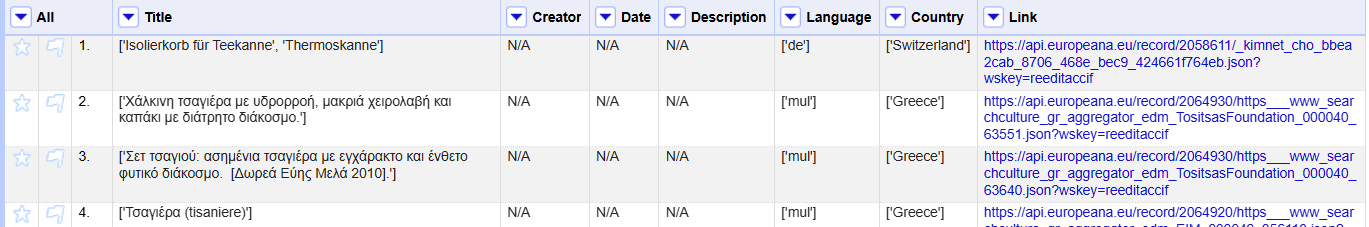


A lot of fields are filled in with N/A. This might be a problem in the script. Therefore I send some new prompts to ChatGPT.

> *prompts: fetch all metadata possible from the records, write full code again. how to get all metadata from the records? use this information: https://pro.europeana.eu/page/metadata, write full code again please. add all edm and dc metadata, write full code again.*

This did not want to work.
At this point I turned to Gemini to solve the problem.
I copied the code and asked to download all metadata. Gemini came with a solution to download the file not in CSV, but in Json format.

> *Prompt (Gemini): how to retrieve all metadata from the records? use the search and record API of Europeana. write full code again.*








In [ ]:
# basic code: reaching all records + translations adjusted
# + spelling + all metadata + json
# generated by ChatGPT 4.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests  # For making HTTP requests
import json      # For working with JSON data
import os        # For interacting with the file system
import time      # For adding delays between requests
from urllib.parse import quote_plus  # For URL encoding
from google.colab import files  # For downloading files in Colab

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check for HTTP errors
            return response  # Return the response if successful
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt  # Exponential backoff
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")
    return None  # Return None if all retries failed

# Function to fetch metadata from Europeana using Search API and Record API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000, chunk_size=10):
    # Create a directory to store the JSON file
    directory = f'downloads/{int(time.time())}/'  # Directory with the current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Initialize variables
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)
    all_metadata = []  # List to store metadata for all records
    json_file_path = os.path.join(directory, 'metadata.json')  # File path for the JSON file

    # Loop through the queries in smaller chunks
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Get a chunk of queries (e.g., 10 terms at a time)
        combined_query = ' OR '.join(query_chunk)  # Combine the queries for the chunk
        print(f"Processing query chunk: {combined_query}")  # Print the chunk for debugging

        # Loop until the desired limit of records is fetched
        while fetched_records < limit:
            # Construct the API request URL with the necessary parameters
            url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                # Use the send_request function to handle retries
                response = send_request(url)
                if response is None:  # If the request failed after retries, stop the loop
                    break

                # Parse the JSON response
                data = response.json()

                # Check if the request was successful
                if not data.get('success', True):
                    print(f"Error: {data.get('error', 'Unknown error')}")
                    break  # Exit if there was an error in the response

                # Ensure the response contains 'items' field
                if 'items' not in data:
                    print("Error: 'items' key not found in response.")
                    break  # Exit if 'items' is not in the response

                # Loop through each record and fetch detailed metadata from the Record API
                for record in data['items']:
                    record_id = record.get('id')  # Extract the record ID to fetch full metadata
                    if record_id:
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'
                        record_response = send_request(record_url)
                        if record_response:
                            record_data = record_response.json()
                            # Collect all metadata fields (EDM, DC, etc.)
                            full_metadata = record_data  # This will include all metadata fields available
                            all_metadata.append(full_metadata)

                            fetched_records += 1
                            print(f"Fetched record {fetched_records}: {record_id}")

                    # Check if we have reached the limit and exit the loop if so
                    if fetched_records >= limit:
                        print(f"Limit reached: {limit} records.")
                        break  # Exit the inner loop

                # Check if there is another page of results to fetch (pagination)
                if 'nextCursor' in data:
                    cursor = data['nextCursor']  # Update the cursor for the next page of results
                else:
                    break  # Exit if there are no more pages of results

                # Pause for 1 second before making the next request (rate limiting)
                time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

            except requests.exceptions.RequestException as e:  # Catch any request-related errors
                print(f"Request error: {e}")
                break  # Exit if there was a request error

            except Exception as e:  # Catch any other general exceptions
                print(f"An unexpected error occurred: {e}")
                break  # Exit if an unexpected error occurred

    # Save the collected metadata into a JSON file
    with open(json_file_path, 'w', encoding='utf-8') as json_file:
        json.dump(all_metadata, json_file, ensure_ascii=False, indent=4)

    # Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"JSON file saved at: {json_file_path}")

    # Step to download the JSON file from Colab (if in Colab environment)
    files.download(json_file_path)  # Download the JSON file

# Step 3: Define the API key (replace with your actual Europeana API key)
api_key = 'reeditaccif'  # Replace with your actual Europeana API key

# Step 4: Define the translations for 'teapot' in various languages (example)
teapot_translations = {
    'en': ['teapot', 't*pot'],            # English
    'nl': ['theepot', 'teepot'],           # Dutch
    'de': ['teekanne', '*eekanne'],        # German
    'fr': ['théière', 'th?i?re'],        # French
    'es': ['tetera'],          # Spanish
    'it': ['teiera'],          # Italian
    'sl': ['čajnik', 'č*ajnik'],          # Slovenian
    'sv': ['teekanne', 'te*k*anne'],      # Swedish
    'ca': ['tetera'],          # Catalan
    'pt': ['teiera', 'te*iera'],          # Portuguese
    'ro': ['teiera'],          # Romanian
    'lt': ['teiera'],          # Lithuanian
    'uk': ['чайник'],           # Ukrainian
    'no': ['kettle'],          # Norwegian
    'sr': ['čajnik', 'č*ajnik'],          # Serbian
    'fi': ['teekanne', 'te?kanne'],       # Finnish
    'da': ['teiere', 't*eiere'],          # Danish
    'is': ['kettle'],           # Icelandic
    'lv': ['teiera'],          # Latvian
    'pl': ['czajnik', 'c*ajnik'],         # Polish
}

# Step 5: Convert the dictionary into a flat list of unique queries
queries = [term for terms in teapot_translations.values() for term in terms]

# Step 6: Define the desired limit (number of records to fetch)
desired_limit = 100  # Set the desired number of records to fetch (e.g., 1000)

# Step 7: Call the function to fetch metadata and save it to a JSON file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to JSON


If I open the Json in Openrefine I can look into the structure of the metadata and distinguish several metadata fields. The file can be parsed into different columns via this structure.  My strategy is to comprehend and deconstruct this structure and extract the datafields that are interesting for further research regarding this project. The names of these fields can be used in the script to retrieve the data via the search and/or record API.

> example: in the JSON file opened in OpenRefine, you can see this. This is a (very small) part of the json structure for an item:



```
[
{
All: N/A,
country: [
Switzerland
],
dataProvider: [
Archaeology and Museum Baselland
],
dcDescription: [
Ovaler Korb, geflochten, mit zwei einfachen Henkeln aus Messing. Gepolsterte Auskleidung aus rot gemustertem Stoff (Textildruck) mit zwei Aussparungen, darin eine Teekanne aus Porzellan, blau bemalt, mit einfachem Henkel aus Draht und eine Teetasse aus Porzellan, blau bemalt, mit chinesischen (?) Schriftzeichen auf dem Tassenboden. Der Korb wird mit einem einfachen Verschluss aus Messing geschlossen.
],
dcDescriptionLangAware: {
de: [
Ovaler Korb, geflochten, mit zwei einfachen Henkeln aus Messing. Gepolsterte Auskleidung aus rot gemustertem Stoff (Textildruck) mit zwei Aussparungen, darin eine Teekanne aus Porzellan, blau bemalt, mit einfachem Henkel aus Draht und eine Teetasse aus Porzellan, blau bemalt, mit chinesischen (?) Schriftzeichen auf dem Tassenboden. Der Korb wird mit einem einfachen Verschluss aus Messing geschlossen.
]
},
```




Below I also added a screenshot of how it looks in OpenRefine. If you create a new project and select the Json as file, you can look into the structure.

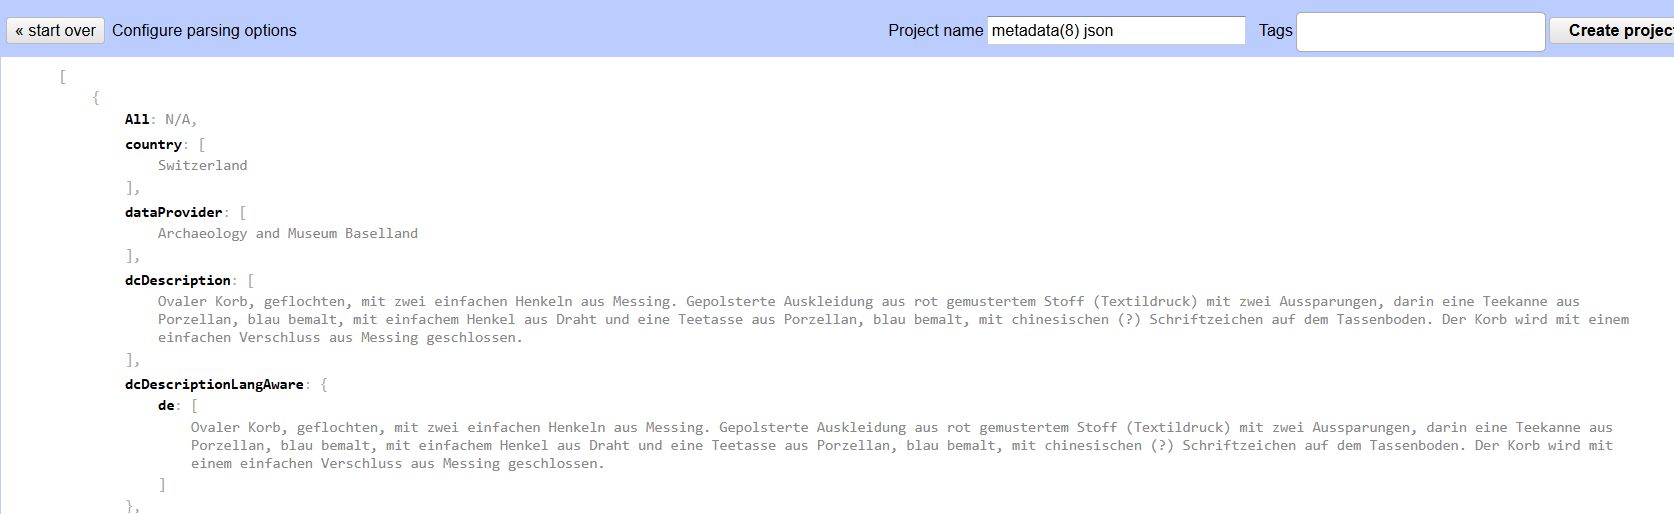

## 1.4.3: Preferred metadata fields

This means that in a next phase my code will be adjusted to specific metadata fields. I note down the fields I want to use of the Json file and implement them into the code. Therefore I will need to rewrite the script to make it download a csv with the corresponding headers.


> *prompt (Gemini): Can you write full code on how to get metadata : on the basis of code above? I need this metadata: dcdescription dcdescriptionlangaware dc language dc titlelangaware dctypelangaware edmcontectlabel edmconceptpreflabellangaware edmplacelabel edmplacelatitude edmplacelongitude rights I would also like an image url, link to europeana, title, europeana id, and edm preview write full code please. use info from https://europeana.atlassian.net/wiki/spaces/EF/pages/2385739812/Search+API+Documentation and from https://pro.europeana.eu/page/edm-documentation*



If we have selected and properly described the metadata fields, we can adjust the preferred number of records to a number higher than the number of results we expect to find (in this case I set the limit to 10000). This way we can download the complete dataset regarding teapots.

In [ ]:
# @title
import requests  # For making HTTP requests
import json      # For working with JSON data
import os        # For interacting with the file system
import time      # For adding delays between requests
from urllib.parse import quote_plus  # For URL encoding
from google.colab import files  # For downloading files in Colab

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Check for HTTP errors
            return response  # Return the response if successful
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt  # Exponential backoff
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")
    return None  # Return None if all retries failed

# Function to fetch metadata from Europeana using Search API and Record API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000, chunk_size=10):
    # Create a directory to store the JSON file
    directory = f'downloads/{int(time.time())}/'  # Directory with the current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Initialize variables
    fetched_records = 0  # Counter for the number of records fetched
    cursor = '*'  # Initialize the cursor for pagination (first page)
    all_metadata = []  # List to store metadata for all records
    json_file_path = os.path.join(directory, 'metadata.json')  # File path for the JSON file

    # Loop through the queries in smaller chunks
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Get a chunk of queries (e.g., 10 terms at a time)
        combined_query = ' OR '.join(query_chunk)  # Combine the queries for the chunk
        print(f"Processing query chunk: {combined_query}")  # Print the chunk for debugging

        # Loop until the desired limit of records is fetched
        while fetched_records < limit:
            # Construct the API request URL with the necessary parameters
            url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                # Use the send_request function to handle retries
                response = send_request(url)
                if response is None:  # If the request failed after retries, stop the loop
                    break

                # Parse the JSON response
                data = response.json()

                # Check if the request was successful
                if not data.get('success', True):
                    print(f"Error: {data.get('error', 'Unknown error')}")
                    break  # Exit if there was an error in the response

                # Ensure the response contains 'items' field
                if 'items' not in data:
                    print("Error: 'items' key not found in response.")
                    break  # Exit if 'items' is not in the response

                # Loop through each record and fetch detailed metadata from the Record API
                for record in data['items']:
                    record_id = record.get('id')  # Extract the record ID to fetch full metadata
                    if record_id:
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'
                        record_response = send_request(record_url)
                        if record_response:
                            record_data = record_response.json()

                            # Extract relevant metadata fields and populate the dictionary
                            metadata = {
                                'All': record.get('all', 'N/A'),
                                'country': record.get('country', 'N/A'),
                                'dataProvider': record.get('dataProvider', 'N/A'),
                                'dcDescription': record.get('dcDescription', 'N/A'),
                                'dcDescriptionLangAware': record.get('dcDescriptionLangAware', 'N/A'),
                                'dcLanguage': record.get('dcLanguage', 'N/A'),
                                'dcLanguageLangAware': record.get('dcLanguageLangAware', 'N/A'),
                                'dcSubjectLangAware': record.get('dcSubjectLangAware', 'N/A'),
                                'dcTitleLangAware': record.get('dcTitleLangAware', 'N/A'),
                                'dcTypeLangAware': record.get('dcTypeLangAware', 'N/A'),
                                'dctermsSpatial': record.get('dctermsSpatial', 'N/A'),
                                'edmConcept': record.get('edmConcept', 'N/A'),
                                'edmConceptLabel': record.get('edmConceptLabel', 'N/A'),
                                'edmConceptPrefLabelLangAware': record.get('edmConceptPrefLabelLangAware', 'N/A'),
                                'edmDatasetName': record.get('edmDatasetName', 'N/A'),
                                'edmIsShownAt': record.get('edmIsShownAt', 'N/A'),
                                'edmIsShownBy': record.get('edmIsShownBy', 'N/A'),
                                'edmPlace': record.get('edmPlace', 'N/A'),
                                'edmPlaceAltLabel': record.get('edmPlaceAltLabel', 'N/A'),
                                'edmPlaceAltLabelLangAware': record.get('edmPlaceAltLabelLangAware', 'N/A'),
                                'edmPlaceLabel': record.get('edmPlaceLabel', 'N/A'),
                                'edmPlaceLabelLangAware': record.get('edmPlaceLabelLangAware', 'N/A'),
                                'edmPlaceLatitude': record.get('edmPlaceLatitude', 'N/A'),
                                'edmPlaceLongitude': record.get('edmPlaceLongitude', 'N/A'),
                                'edmPreview': record.get('edmPreview', 'N/A'),
                                'europeanaCollectionName': record.get('europeanaCollectionName', 'N/A'),
                                'europeanaCompleteness': record.get('europeanaCompleteness', 'N/A'),
                                'guid': record.get('guid', 'N/A'),
                                'id': record.get('id', 'N/A'),
                                'index': record.get('index', 'N/A'),
                                'language': record.get('language', 'N/A'),
                                'link': record.get('link', 'N/A'),
                                'organizations': record.get('organizations', 'N/A'),
                                'previewNoDistribute': record.get('previewNoDistribute', 'N/A'),
                                'provider': record.get('provider', 'N/A'),
                                'rights': record.get('rights', 'N/A'),
                                'timestamp': record.get('timestamp', 'N/A'),
                                'timestamp_created': record.get('timestamp_created', 'N/A'),
                                'timestamp_created_epoch': record.get('timestamp_created_epoch', 'N/A'),
                                'title': record.get('title', 'N/A'),
                                'type': record.get('type', 'N/A'),
                                'ugc': record.get('ugc', 'N/A'),
                                'europeana_id': record.get('id', 'N/A'),  # Ensure Europeana ID is set
                            }

                            all_metadata.append(metadata)  # Add the metadata to the list
                            fetched_records += 1
                            print(f"Fetched record {fetched_records}: {record_id}")

                    # Check if we have reached the limit and exit the loop if so
                    if fetched_records >= limit:
                        print(f"Limit reached: {limit} records.")
                        break  # Exit the inner loop

                # Check if there is another page of results to fetch (pagination)
                if 'nextCursor' in data:
                    cursor = data['nextCursor']  # Update the cursor for the next page of results
                else:
                    break  # Exit if there are no more pages of results

                # Pause for 1 second before making the next request (rate limiting)
                time.sleep(1)  # Prevent overloading the Europeana API by adding a delay between requests

            except requests.exceptions.RequestException as e:  # Catch any request-related errors
                print(f"Request error: {e}")
                break  # Exit if there was a request error

            except Exception as e:  # Catch any other general exceptions
                print(f"An unexpected error occurred: {e}")
                break  # Exit if an unexpected error occurred

    # Save the collected metadata into a JSON file
    with open(json_file_path, 'w', encoding='utf-8') as json_file:
        json.dump(all_metadata, json_file, ensure_ascii=False, indent=4)

    # Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"JSON file saved at: {json_file_path}")

    # Step to download the JSON file from Colab (if in Colab environment)
    files.download(json_file_path)  # Download the JSON file

# Step 3: Define the API key (replace with your actual Europeana API key)
api_key = 'reeditaccif'  # Replace with your actual Europeana API key

# Step 4: Define the translations for 'teapot' in various languages (example)
teapot_translations = {
    'en': ['teapot', 't*pot'],            # English
    'nl': ['theepot', 'teepot'],           # Dutch
    'de': ['teekanne', '*eekanne'],        # German
    'fr': ['théière', 'th?i?re'],        # French
    'es': ['tetera'],          # Spanish
    'it': ['teiera'],          # Italian
    'sl': ['čajnik', 'č*ajnik'],          # Slovenian
    'sv': ['teekanne', 'te*k*anne'],      # Swedish
    'ca': ['tetera'],          # Catalan
    'pt': ['teiera', 'te*iera'],          # Portuguese
    'ro': ['teiera'],          # Romanian
    'lt': ['teiera'],          # Lithuanian
    'uk': ['чайник'],           # Ukrainian
    'no': ['kettle'],          # Norwegian
    'sr': ['čajnik', 'č*ajnik'],          # Serbian
    'fi': ['teekanne', 'te?kanne'],       # Finnish
    'da': ['teiere', 't*eiere'],          # Danish
    'is': ['kettle'],           # Icelandic
    'lv': ['teiera'],          # Latvian
    'pl': ['czajnik', 'c*ajnik'],         # Polish
}

# Step 5: Convert the dictionary into a flat list of unique queries
queries = [term for terms in teapot_translations.values() for term in terms]

# Step 6: Define the desired limit (number of records to fetch)
desired_limit = 100  # Set the desired number of records to fetch (e.g., 1000)

# Step 7: Call the function to fetch metadata and save it to a JSON file
fetch_europeana_metadata(api_key, queries, limit=desired_limit)  # Fetch data and save to JSON


After having looked at the dataset in Openrefine, I decided to shrink down the number of metadata fields or rethink my strategy. At the moment the dataset takes more than 1h to download. I also noticed that I do not need all the fields that are asked for here. In the following part I make a reduction to these fields or fields related to them:

> - title
- description
- language
- country
- date of work (or year)
- related concepts
- style
- data/object provider
- organisation
- place
- latitude and longitude
- thumbnail preview
- image url
- europeana url
- rights
- europeana id


## 1.4.4: extracting date and time/period

So far we were able to extract a lot of different metadata.
One big problem was extracting the proper date from the records in Europeana. My first clue to solve this problem was through an example on Toledo (the study platform of KULeuven) provided by my professor (Fred Truyen). I added the example here for convenience.

```
#This code is imported from the Katanga example on Toledo by prof. Fred Truyen and Dr. Periddu
import requests
import json
import re #via deze module kunen we reguliere expressies uitvoeren

# Save this file to your own Collab drive to edit.
# Replace 'YOUR_API_KEY' with your actual Europeana API key
API_KEY = "YOUR_API_KEY"

def search_europeana(query, num_results=10):
    """
    Searches the Europeana API for items matching the given query.

    Args:
      query (str): The search term.
      num_results (int): The maximum number of results to return.

    Returns:
      list: A list of dictionaries containing metadata for the items.
    """
    url = f"https://api.europeana.eu/record/v2/search.json?wskey={API_KEY}&query={query}&media=true&qf=TYPE:IMAGE&rows={num_results}"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        data = response.json()
        items = data.get("items", [])  # Extract items from the response
        return items
    except requests.exceptions.RequestException as e:
        print(f"Error accessing Europeana API: {e}")
        return None

# Example Usage:
search_term = "Katanga"
num_results = 100
results = search_europeana(search_term, num_results)

if results:
    print(f"Found {len(results)} items matching '{search_term}':")
    for item in results:
        creator = item.get("dcCreator", "No creators available")
        lang = item.get("language", "No language available")
        guid = item.get("guid", "No GUID available")
        guid = re.sub(r"(https\:\/\/.*)(\?.*)", r'\1', guid) #we knippen onnodig stuk URL af met een reguliere expressie
        dataprovider = item.get("dataProvider", "No provider available")
        isshownat = item.get("edmIsShownAt", "No source image available")
        title = item.get("title", "No title available")
        media = item.get("edmPreview", ["No image available"])[0]

        print(f"- Creator: {creator}")
        print(f"- Title: {title}")
        print(f"- Language: {lang}")
        print(f"- Dataprovider: {dataprovider}")
        print(f"- Europeana URL: {guid}")
        print(f"- LanguageIsShownAt: {isshownat}")
        print(f"  Image URL: {media}")
        print("---")

else:
    print("No results found or an error occurred.")
```



> *prompt (Gemini): i cannot extract the data properly, i get no date available, how do i fix this code; this code (katanga example) works, can you fix the first code (the script) on basis of this second (katanga)*

after a couple of tries on ChatGPT and Gemini, this did not work. After a while Gemini asked me to send the JSON structure again so we could analyse it to find the correct fields regarding date and time for the records. I asked how to do this and it send me the code below to get an overview of the JSON structure through the script.


In [ ]:
# Script for Json structure printed in result
# Generated by gemini
# authorized by Jenske Verhamme on 16/04/2025

import requests
import csv
import os
import time
from urllib.parse import quote_plus
from google.colab import files
import json  # Import the json library

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()
            return response
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
    print("Max retries reached. Exiting...")
    return None

# Function to fetch metadata from Europeana using Search API and Record API
def fetch_europeana_metadata(api_key, queries, rows=100, limit=1000, chunk_size=10):
    # Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'
    os.makedirs(directory, exist_ok=True)

    # Initialize variables
    fetched_records = 0
    cursor = '*'
    all_metadata = []
    csv_file_path = os.path.join(directory, 'metadata.csv')

    # Define the CSV fieldnames (headers) - Added new fields for EDM TimeSpan
    fieldnames = [
        'All', 'country', 'dataProvider', 'dcDescription', 'dcDescriptionLangAware',
        'dcLanguage', 'dcLanguageLangAware', 'dcSubjectLangAware', 'dcTitleLangAware',
        'dcTypeLangAware', 'dctermsSpatial', 'edmConcept', 'edmConceptLabel',
        'edmConceptPrefLabelLangAware', 'edmDatasetName', 'edmIsShownAt',
        'edmIsShownBy', 'edmPlace', 'edmPlaceAltLabel', 'edmPlaceAltLabelLangAware',
        'edmPlaceLabel', 'edmPlaceLabelLangAware', 'edmPlaceLatitude', 'edmPlaceLongitude',
        'edmPreview', 'europeanaCollectionName', 'europeanaCompleteness', 'guid', 'id',
        'index', 'language', 'link', 'organizations', 'provider',
        'rights', 'title', 'type', 'europeana_id', 'dcDate',
        'edmTimeSpanBegin', 'edmTimeSpanEnd', 'edmTimeSpanLabel'
    ]

    # Loop through the queries in smaller chunks
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]
        combined_query = ' OR '.join(query_chunk)
        print(f"Processing query chunk: {combined_query}")

        # Loop until the desired limit of records is fetched
        while fetched_records < limit:
            # Construct the API request URL with the necessary parameters
            url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                # Use the send_request function to handle retries
                response = send_request(url)
                if response is None:
                    break

                # Parse the JSON response
                data = response.json()

                # Check if the request was successful
                if not data.get('success', True):
                    print(f"Error: {data.get('error', 'Unknown error')}")
                    break

                # Ensure the response contains 'items' field
                if 'items' not in data:
                    print("Error: 'items' key not found in response.")
                    break

                # Loop through each record and fetch detailed metadata from the Record API
                for record in data['items']:
                    record_id = record.get('id')
                    if record_id:
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'
                        record_response = send_request(record_url)
                        if record_response:
                            record_data = record_response.json()
                            print(json.dumps(record_data, indent=4))  # Print the raw JSON

                            # Initialize EDM TimeSpan fields
                            edm_begin = 'N/A'
                            edm_end = 'N/A'
                            edm_label = 'N/A'

                            # Extract relevant metadata fields and populate the dictionary
                            metadata = {
                                'All': record.get('all', 'N/A'),
                                'country': record.get('country', 'N/A'),
                                'dataProvider': record.get('dataProvider', 'N/A'),
                                'dcDescription': record.get('dcDescription', 'N/A'),
                                'dcDescriptionLangAware': record.get('dcDescriptionLangAware', 'N/A'),
                                'dcLanguage': record.get('dcLanguage', 'N/A'),
                                'dcLanguageLangAware': record.get('dcLanguageLangAware', 'N/A'),
                                'dcSubjectLangAware': record.get('dcSubjectLangAware', 'N/A'),
                                'dcTitleLangAware': record.get('dcTitleLangAware', 'N/A'),
                                'dcTypeLangAware': record.get('dcTypeLangAware', 'N/A'),
                                'dctermsSpatial': record.get('dctermsSpatial', 'N/A'),
                                'edmConcept': record.get('edmConcept', 'N/A'),
                                'edmConceptLabel': record.get('edmConceptLabel', 'N/A'),
                                'edmConceptPrefLabelLangAware': record.get('edmConceptPrefLabelLangAware', 'N/A'),
                                'edmDatasetName': record.get('edmDatasetName', 'N/A'),
                                'edmIsShownAt': record.get('edmIsShownAt', 'N/A'),
                                'edmIsShownBy': record.get('edmIsShownBy', 'N/A'),
                                'edmPlace': record.get('edmPlace', 'N/A'),
                                'edmPlaceAltLabel': record.get('edmPlaceAltLabel', 'N/A'),
                                'edmPlaceAltLabelLangAware': record.get('edmPlaceAltLabelLangAware', 'N/A'),
                                'edmPlaceLabel': record.get('edmPlaceLabel', 'N/A'),
                                'edmPlaceLabelLangAware': record.get('edmPlaceLabelLangAware', 'N/A'),
                                'edmPlaceLatitude': record.get('edmPlaceLatitude', 'N/A'),
                                'edmPlaceLongitude': record.get('edmPlaceLongitude', 'N/A'),
                                'edmPreview': record.get('edmPreview', 'N/A'),
                                'europeanaCollectionName': record.get('europeanaCollectionName', 'N/A'),
                                'europeanaCompleteness': record.get('europeanaCompleteness', 'N/A'),
                                'guid': record.get('guid', 'N/A'),
                                'id': record.get('id', 'N/A'),
                                'index': record.get('index', 'N/A'),
                                'language': record.get('language', 'N/A'),
                                'link': record.get('link', 'N/A'),
                                'organizations': record.get('organizations', 'N/A'),
                                'provider': record.get('provider', 'N/A'),
                                'rights': record.get('rights', 'N/A'),
                                'title': record.get('title', 'N/A'),
                                'type': record.get('type', 'N/A'),
                                'europeana_id': record.get('id', 'N/A'),
                                'dcDate': 'No date available', # Initialize dcDate
                                'edmTimeSpanBegin': edm_begin,
                                'edmTimeSpanEnd': edm_end,
                                'edmTimeSpanLabel': edm_label,
                            }

                            # Try to find the date in various simpler fields first
                            date = record_data.get('object', {}).get('dcDate')
                            if not date:
                                date = record_data.get('object', {}).get('dcterms:created')
                            if not date:
                                date = record_data.get('object', {}).get('year')
                            if not date:
                                date = record_data.get('object', {}).get('edmTimespanLabel')
                            if not date:
                                timespan_lang_aware = record_data.get('object', {}).get('edmTimespanLabelLangAware')
                                if isinstance(timespan_lang_aware, dict):
                                    date = timespan_lang_aware.get('en')
                                    if not date and timespan_lang_aware:
                                        date = next(iter(timespan_lang_aware.values()))

                            # Handle cases where the simple date might be a list
                            if isinstance(date, list):
                                metadata['dcDate'] = date[0] if date else 'No date available'
                            elif date:
                                metadata['dcDate'] = date
                            else:
                                metadata['dcDate'] = 'No date available'

                            # Now let's look for edm:TimeSpan
                            timespans = record_data.get('object', {}).get('timespan', [])
                            if isinstance(timespans, list) and timespans:
                                # Iterate through the list of time spans and try to find relevant info
                                for ts in timespans:
                                    begin = ts.get('begin')
                                    end = ts.get('end')
                                    label_data = ts.get('label')
                                    label = 'N/A'
                                    if isinstance(label_data, list) and label_data:
                                        # Prioritize English label if available
                                        for l in label_data:
                                            if isinstance(l, dict) and l.get('lang') == 'en' and l.get('value'):
                                                label = l['value']
                                                break
                                        # If no English, take the first available label
                                        if label == 'N/A' and label_data[0].get('value'):
                                            label = label_data[0]['value']
                                    elif isinstance(label_data, dict) and label_data.get('value'):
                                        label = label_data['value']

                                    if begin:
                                        metadata['edmTimeSpanBegin'] = begin.get('at', 'N/A') if isinstance(begin, dict) else begin
                                    if end:
                                        metadata['edmTimeSpanEnd'] = end.get('at', 'N/A') if isinstance(end, dict) else end
                                    if label != 'N/A':
                                        metadata['edmTimeSpanLabel'] = label
                                        # If we found a label, we might want to use this as the primary date
                                        if metadata['dcDate'] == 'No date available' and label != 'N/A':
                                            metadata['dcDate'] = label
                                        break # Assuming the first relevant TimeSpan is sufficient

                            all_metadata.append(metadata)
                            fetched_records += 1
                            print(f"Fetched record {fetched_records}: {record_id}")

                            if fetched_records >= limit:
                                print(f"Limit reached: {limit} records.")
                                break

                # Check if there is another page of results to fetch (pagination)
                if 'nextCursor' in data:
                    cursor = data['nextCursor']
                else:
                    break

                # Pause for 1 second before making the next request (rate limiting)
                time.sleep(1)

            except requests.exceptions.RequestException as e:
                print(f"Request error: {e}")
                break
            except Exception as e:
                print(f"An unexpected error occurred: {e}")
                break

    # Save the collected metadata into a CSV file
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(all_metadata)

    # Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

    # Step to download the CSV file from Colab (if in Colab environment)
    if 'google.colab' in str(get_ipython()):
        files.download(csv_file_path)

# Step 3: Define the API key (replace with your actual Europeana API key)
api_key = 'reeditaccif'  # Replace with your actual Europeana API key

# Step 4: Define the translations for 'teapot' in various languages (example)
teapot_translations = {
    'en': ['teapot', 't*pot'],
    'nl': ['theepot', 'teepot'],
    'de': ['teekanne', '*eekanne'],
    'fr': ['théière', 'th?i?re'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik', 'č*ajnik'],
    'sv': ['teekanne', 'te*k*anne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te*iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', 'č*ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't*eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'c*ajnik'],
}

# Step 5: Convert the dictionary into a flat list of unique queries
queries = [term for terms in teapot_translations.values() for term in terms]
unique_queries = list(set(queries))

# Step 6: Define the desired limit (number of records to fetch)
desired_limit = 10

# Step 7: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata(api_key, unique_queries, limit=desired_limit)

I send the JSON output results above back to Gemini. The advantage of Gemini is that you can add files to your questions (for free). In this case I made a txt file of the script results in windows Notepad and saved it as 'jsondata.txt'. Gemini was able to analyse the JSON-format and was able to extract to correct fields regarding date/year. It corrected the code to the dcdate. But it still did not work properly, so I tried something else and started from scratch to extract dates and times/periods.

> *prompt (Gemini): Write a script in python that extracts all the time and date related to 'teapot' in the europeana collection via api key and search api and record api. I only want to test the first 100 records. use information found here https://pro.europeana.eu/page/metadata and take this as example: https://www.europeana.eu/nl/item/90402/BK_15783_A?lang=en .*

> *I got this result for all rows: No relevant date/time information found for this record based on prioritized fields. can this example help you to find the date and time related metadata? this example succeeds in extracting years (katanga)? why does this example work and our code does not? rewrite our script on the basis of what you discovered in the example. I hope we get the data this way. write in full please.  i also want to download to records and download them from collab to my local pc.*



> *Prompt: I want to integrate the full working code with the working code for date. can you do this for me?*

> *Prompt: write a script that uses code 1) (mentioned earlier for metadatafields) for the fields i mentioned that give n/a and use code 2) (mentioned earlier for dates and times/periods) for the fields with dates (that work fine now, so no need to adjust that part of the code).*


> *Prompt: dcDescription dcDescriptionLangAware dcLanguage dcLanguageLangAware dcSubjectLangAware dcTitleLangAware dcTypeLangAware dctermsSpatial edmConceptedmConceptLabel edmConceptPrefLabelLangAware, edmIsShownAt edmIsShownBy edmPlaceedmPlaceAltLabel edmPlaceAltLabelLangAware edmPlaceLabel edmPlaceLabelLangAware edmPlaceLatitude edmPlaceLongitude:
all these fields give n/a, while in previous code they worked perfectly, it seems mostly the fields of code 1 work well, can you adjust the code so that the field above show results instead of N/A? (probably on basis of code 2) write full code please*

> *Prompt:
 still have the same problem with the NA, can you base yourself on code 2) for these metadatafields please? i just want a solution, it does not need to be elegant*



In [ ]:
# Code with analyzed JSON and succesful date extraction
# generated by Gemini 2.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests
import csv
import os
import time
from urllib.parse import quote_plus
from google.colab import files
import json
import pandas as pd

# Define the get_safe function BEFORE it's called
def get_safe(data, keys):
    temp = data
    for key in keys:
        if isinstance(temp, dict) and key in temp:
            temp = temp[key]
        elif isinstance(temp, list) and temp:
            temp = temp[0].get(key) if isinstance(temp[0], dict) else None
        else:
            return 'N/A'
    return temp if temp is not None else 'N/A'

# Replace with your actual Europeana API key
API_KEY = "reeditaccif"

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()
            return response
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
    print("Max retries reached. Exiting...")
    return None

def extract_dates_from_search_hit(item):
    """
    Extracts date-related information directly from a Europeana search result item.

    Args:
        item (dict): A single item from the 'items' list in the search results.

    Returns:
        dict: A dictionary containing extracted date-related fields.
    """
    dates = {}
    for key, value in item.items():
        if "date" in key.lower() or "year" in key.lower() or "time" in key.lower() or "period" in key.lower():
            dates[key] = value
    return dates

def fetch_europeana_metadata_combined(api_key, queries, rows=100, limit=1000, chunk_size=10):
    # Create a directory to store the CSV file
    directory = f'downloads/{int(time.time())}/'
    os.makedirs(directory, exist_ok=True)

    # Initialize variables
    fetched_records = 0
    cursor = '*'
    all_metadata = []
    csv_file_path = os.path.join(directory, 'metadata_combined_dates.csv')

    # Define the CSV fieldnames (headers) - Include potential date fields from search
    fieldnames = [
        'europeana_id', 'All', 'country', 'dataProvider', 'dcDescription', 'dcDescriptionLangAware',
        'dcLanguage', 'dcLanguageLangAware', 'dcSubjectLangAware', 'dcTitleLangAware',
        'dcTypeLangAware', 'dctermsSpatial', 'edmConcept', 'edmConceptLabel',
        'edmConceptPrefLabelLangAware', 'edmIsShownAt', 'edmIsShownBy', 'edmPlace',
        'edmPlaceAltLabel', 'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude', 'edmPreview', 'europeanaCollectionName',
        'europeanaCompleteness', 'guid', 'id', 'index', 'language', 'link', 'organizations',
        'provider', 'rights', 'title', 'type',
        # Potential date/time fields from search results will be added dynamically
    ]
    dynamic_date_fields = set()

    # Fields to try extracting directly from the search hit (Code 1)
    fields_from_search_hit = [
        'dcDescription', 'dcDescriptionLangAware', 'dcLanguage', 'dcLanguageLangAware',
        'dcSubjectLangAware', 'dcTitleLangAware', 'dcTypeLangAware', 'dctermsSpatial',
        'edmConcept', 'edmConceptLabel', 'edmConceptPrefLabelLangAware',
        'edmIsShownAt', 'edmIsShownBy', 'edmPlace', 'edmPlaceAltLabel',
        'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude'
    ]

    # Loop through the queries in smaller chunks
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]
        combined_query = ' OR '.join(query_chunk)
        print(f"Processing query chunk: {combined_query}")

        # Loop until the desired limit of records is fetched
        while fetched_records < limit:
            # Construct the API request URL with the necessary parameters
            search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                # Use the send_request function to handle retries
                search_response = send_request(search_url)
                if search_response is None:
                    break

                # Parse the JSON response
                search_data = search_response.json()

                # Check if the request was successful
                if not search_data.get('success', True):
                    print(f"Error: {search_data.get('error', 'Unknown error')}")
                    break

                # Ensure the response contains 'items' field
                if 'items' not in search_data:
                    print("Error: 'items' key not found in response.")
                    break

                # Loop through each record in the search results
                for item in search_data['items']:
                    record_id = item.get('id')
                    if record_id and fetched_records < limit:
                        # Extract date/time info from the search hit (Code 1 - for dates)
                        search_dates = extract_dates_from_search_hit(item)
                        dynamic_date_fields.update(search_dates.keys())

                        # Initialize metadata dictionary
                        metadata = {
                            'europeana_id': item.get('id', 'N/A'),
                            'All': item.get('all', 'N/A'),
                            'country': item.get('country', 'N/A'),
                            'dataProvider': item.get('dataProvider', 'N/A'),
                            'edmPreview': item.get('edmPreview', 'N/A'),
                            'europeanaCollectionName': item.get('europeanaCollectionName', 'N/A'),
                            'europeanaCompleteness': item.get('europeanaCompleteness', 'N/A'),
                            'guid': item.get('guid', 'N/A'),
                            'id': item.get('id', 'N/A'),
                            'index': item.get('index', 'N/A'),
                            'language': item.get('language', 'N/A'),
                            'link': item.get('link', 'N/A'),
                            'organizations': item.get('organizations', 'N/A'),
                            'provider': item.get('provider', 'N/A'),
                            **search_dates
                        }

                        # Try to extract the specified fields directly from the search hit (Code 1)
                        for field in fields_from_search_hit:
                            metadata[field] = item.get(field, 'N/A')

                        # Fetch the full metadata using the Record API (Code 2 - for the rest)
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'
                        record_response = send_request(record_url)
                        if record_response:
                            record_data = record_response.json()
                            obj = record_data.get('object', {})

                            # Extract the remaining fields from the full record (Code 2)
                            metadata['rights'] = obj.get('rights', 'N/A')
                            metadata['title'] = get_safe(obj, ['title', 0])
                            metadata['type'] = get_safe(obj, ['type', 0])

                            all_metadata.append(metadata)
                            fetched_records += 1
                            print(f"Fetched record {fetched_records}/{limit}: {record_id}")
                            time.sleep(1)  # Be mindful of rate limiting
                        else:
                            print(f"Failed to fetch record: {record_id}")

                if 'nextCursor' in search_data:
                    cursor = search_data['nextCursor']
                else:
                    break

                time.sleep(1)  # Be mindful of rate limiting between search requests

            except requests.exceptions.RequestException as e:
                print(f"Request error: {e}")
                break
            except Exception as e:
                print(f"An unexpected error occurred: {e}")
                break

    # Update fieldnames to include all dynamically found date fields
    updated_fieldnames = list(fieldnames) + list(dynamic_date_fields)

    # Save the collected metadata into a CSV file
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=updated_fieldnames)
        writer.writeheader()
        writer.writerows(all_metadata)

    # Print completion message
    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

    # Step to download the CSV file from Colab (if in Colab environment)
    if 'google.colab' in str(get_ipython()):
        files.download(csv_file_path)

# Step 3: Define the API key (replace with your actual Europeana API key)
api_key = 'reeditaccif'  # Replace with your actual Europeana API key

# Step 4: Define the translations for 'teapot' in various languages (example)
teapot_translations = {
    'en': ['teapot', 't*pot'],
    'nl': ['theepot', 'teepot'],
    'de': ['teekanne', '*eekanne'],
    'fr': ['théière', 'th?i?re'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik', 'č*ajnik'],
    'sv': ['teekanne', 'te*k*anne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te*iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', 'č*ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't*eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'c*ajnik'],
}

# Step 5: Convert the dictionary into a flat list of unique queries
queries = [term for terms in teapot_translations.values() for term in terms]
unique_queries = list(set(queries))

# Step 6: Define the desired limit (number of records to fetch)
desired_limit = 10

# Step 7: Call the function to fetch metadata and save it to a CSV file
fetch_europeana_metadata_combined(api_key, unique_queries, limit=desired_limit)
print("Fetching and saving process initiated")

## 1.4.5 Title, Type and Rights fields

So far we are getting results for all fields mentioned in our code, except for three fields: type, title and rights. The code does not show image type, rights and title properly. I asked chatgpt to solve this problem. It came up with a solution for the type field. Rights and title stil give the same problem:

> *prompt: hey this code works perfectly except for the fields 'rights',	'title' and 'type'. Can you fix this code? I found an example where the title and rights were properly extracted (see earlier, katanga). Can you fix the part of my code with the part of the code below that is relevant to solve the problem?*

In [ ]:
# Code with analyzed JSON and succesful date extraction and type fix
# generated by Gemini 2.0 on 15/04/2025
# authorized by Jenske Verhamme
import requests
import csv
import os
import time
from urllib.parse import quote_plus
from google.colab import files
import json
import pandas as pd

# Replace with your actual Europeana API key
API_KEY = "reeditaccif"

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0
    while attempt < retries:
        try:
            response = requests.get(url)
            response.raise_for_status()
            return response
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
    print("Max retries reached. Exiting...")
    return None

def extract_dates_from_search_hit(item):
    dates = {}
    for key, value in item.items():
        if "date" in key.lower() or "year" in key.lower() or "time" in key.lower() or "period" in key.lower():
            dates[key] = value
    return dates

def fetch_europeana_metadata_combined(api_key, queries, rows=100, limit=1000, chunk_size=10):
    directory = f'downloads/{int(time.time())}/'
    os.makedirs(directory, exist_ok=True)

    fetched_records = 0
    cursor = '*'
    all_metadata = []
    csv_file_path = os.path.join(directory, 'metadata_combined_dates.csv')

    fieldnames = [
        'europeana_id', 'All', 'country', 'dataProvider', 'dcDescription', 'dcDescriptionLangAware',
        'dcLanguage', 'dcLanguageLangAware', 'dcSubjectLangAware', 'dcTitleLangAware',
        'dcTypeLangAware', 'dctermsSpatial', 'edmConcept', 'edmConceptLabel',
        'edmConceptPrefLabelLangAware', 'edmIsShownAt', 'edmIsShownBy', 'edmPlace',
        'edmPlaceAltLabel', 'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude', 'edmPreview', 'europeanaCollectionName',
        'europeanaCompleteness', 'guid', 'id', 'index', 'language', 'link', 'organizations',
        'provider', 'rights', 'title', 'type',
    ]
    dynamic_date_fields = set()

    fields_from_search_hit = [
        'dcDescription', 'dcDescriptionLangAware', 'dcLanguage', 'dcLanguageLangAware',
        'dcSubjectLangAware', 'dcTitleLangAware', 'dcTypeLangAware', 'dctermsSpatial',
        'edmConcept', 'edmConceptLabel', 'edmConceptPrefLabelLangAware',
        'edmIsShownAt', 'edmIsShownBy', 'edmPlace', 'edmPlaceAltLabel',
        'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude'
    ]

    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]
        combined_query = ' OR '.join(query_chunk)
        print(f"Processing query chunk: {combined_query}")

        while fetched_records < limit:
            search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                search_response = send_request(search_url)
                if search_response is None:
                    break

                search_data = search_response.json()
                if not search_data.get('success', True):
                    print(f"Error: {search_data.get('error', 'Unknown error')}")
                    break

                if 'items' not in search_data:
                    print("Error: 'items' key not found in response.")
                    break

                for item in search_data['items']:
                    record_id = item.get('id')
                    if record_id and fetched_records < limit:
                        search_dates = extract_dates_from_search_hit(item)
                        dynamic_date_fields.update(search_dates.keys())

                        metadata = {
                            'europeana_id': item.get('id', 'N/A'),
                            'All': item.get('all', 'N/A'),
                            'country': item.get('country', 'N/A'),
                            'dataProvider': item.get('dataProvider', 'N/A'),
                            'edmPreview': item.get('edmPreview', 'N/A'),
                            'europeanaCollectionName': item.get('europeanaCollectionName', 'N/A'),
                            'europeanaCompleteness': item.get('europeanaCompleteness', 'N/A'),
                            'guid': item.get('guid', 'N/A'),
                            'id': item.get('id', 'N/A'),
                            'index': item.get('index', 'N/A'),
                            'language': item.get('language', 'N/A'),
                            'link': item.get('link', 'N/A'),
                            'organizations': item.get('organizations', 'N/A'),
                            'provider': item.get('provider', 'N/A'),
                            **search_dates
                        }

                        for field in fields_from_search_hit:
                            metadata[field] = item.get(field, 'N/A')

                        # ✅ Extract title directly from item (most reliable)
                        title = item.get("title")
                        if isinstance(title, list) and title:
                            metadata['title'] = title[0]
                        elif isinstance(title, str):
                            metadata['title'] = title
                        else:
                            metadata['title'] = "No title available"

                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'
                        record_response = send_request(record_url)
                        if record_response:
                            record_data = record_response.json()
                            obj = record_data.get('object', {})

                            metadata['rights'] = obj.get('rights', 'N/A')
                            metadata['type'] = obj.get('type', 'N/A')

                            all_metadata.append(metadata)
                            fetched_records += 1
                            print(f"Fetched record {fetched_records}/{limit}: {record_id}")
                            time.sleep(1)
                        else:
                            print(f"Failed to fetch record: {record_id}")

                if 'nextCursor' in search_data:
                    cursor = search_data['nextCursor']
                else:
                    break

                time.sleep(1)

            except requests.exceptions.RequestException as e:
                print(f"Request error: {e}")
                break
            except Exception as e:
                print(f"An unexpected error occurred: {e}")
                break

    updated_fieldnames = list(fieldnames) + list(dynamic_date_fields)

    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=updated_fieldnames)
        writer.writeheader()
        writer.writerows(all_metadata)

    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")

    if 'google.colab' in str(get_ipython()):
        files.download(csv_file_path)

# Input data
api_key = 'reeditaccif'

teapot_translations = {
    'en': ['teapot'],
    'nl': ['theepot', 'tee?pot'],
    'de': ['teekanne', '*eekanne'],
    'fr': ['théière', 'th?i?re'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik', '?ajnik'],
    'sv': ['teekanne', 'te??anne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te*iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', '?ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't?eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'cajnik'],
}

queries = [term for terms in teapot_translations.values() for term in terms]
unique_queries = list(set(queries))
desired_limit = 10

fetch_europeana_metadata_combined(api_key, unique_queries, limit=desired_limit)


finally, I tried to solve the rights and title field on the basis of earlier succesfull results.

> *prompt: we wil ltake a new approach. here is the code that works good, except for that it shows the title field as n/a in all my results, I want to fix this. I provide an example where the title field can be succesfully extracted. Can you use this to fix
Here is my code that needs to be fixed. fix only the part for extract the title field properly. *

Once this worked, I asked ChatGPT to apply the same strategy to the rights field.

> *prompt: can you do the same for the rights field? it also shows n/a for all records. correct only the rights field in this way and present me the full code again please*

In [ ]:
# Code with analyzed JSON and succesful date extraction + type, rights, title (attempt unsuccesfull)
# generated by Gemini 2.0 on 15/04/2025
# authorized by Jenske Verhamme
# Import necessary libraries
import requests  # Used for making HTTP requests
import csv  # Used for writing data to CSV files
import os  # Used for creating directories and handling file paths
import time  # Used for adding delays between requests
from urllib.parse import quote_plus  # Used for encoding special characters in URLs
from google.colab import files  # Used for downloading files from Google Colab
import json  # Used for handling JSON data
import pandas as pd  # Used for data manipulation and analysis (though not used in this script directly)

# Replace with your actual Europeana API key
API_KEY = "reeditaccif"  # Your API key to access Europeana API

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0  # Initialize attempt counter
    while attempt < retries:  # Loop for retries if request fails
        try:
            response = requests.get(url)  # Send GET request
            response.raise_for_status()  # Raise an error for bad HTTP status codes (e.g., 404, 500)
            return response  # If successful, return the response
        except requests.exceptions.RequestException as e:  # Catch any exceptions related to the request
            print(f"Attempt {attempt + 1} failed: {e}")  # Print error message if request fails
            attempt += 1  # Increment the attempt counter
            wait_time = backoff_factor ** attempt  # Increase wait time exponentially between retries
            print(f"Retrying in {wait_time} seconds...")  # Inform the user about the retry
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")  # If max retries reached, print message and exit
    return None  # Return None if all retries fail

# Function to extract date-related fields from an item's metadata
def extract_dates_from_search_hit(item):
    dates = {}  # Initialize empty dictionary to store date-related fields
    for key, value in item.items():  # Loop over all fields in the item
        if "date" in key.lower() or "year" in key.lower() or "time" in key.lower() or "period" in key.lower():
            dates[key] = value  # If the field name contains 'date', 'year', 'time', or 'period', add it to the dictionary
    return dates  # Return the dictionary containing date-related fields

# Main function to fetch metadata from Europeana API based on search queries
def fetch_europeana_metadata_combined(api_key, queries, rows=100, limit=1000, chunk_size=10):
    directory = f'downloads/{int(time.time())}/'  # Create a directory based on current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    fetched_records = 0  # Initialize counter for fetched records
    cursor = '*'  # Initialize cursor for pagination (used to get the next set of results)
    all_metadata = []  # List to store metadata of all fetched records
    csv_file_path = os.path.join(directory, 'metadata_combined_dates.csv')  # Path for saving the CSV file

    # List of fieldnames to be included in the CSV file
    fieldnames = [
        'europeana_id', 'All', 'country', 'dataProvider', 'dcDescription', 'dcDescriptionLangAware',
        'dcLanguage', 'dcLanguageLangAware', 'dcSubjectLangAware', 'dcTitleLangAware',
        'dcTypeLangAware', 'dctermsSpatial', 'edmConcept', 'edmConceptLabel',
        'edmConceptPrefLabelLangAware', 'edmIsShownAt', 'edmIsShownBy', 'edmPlace',
        'edmPlaceAltLabel', 'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude', 'edmPreview', 'europeanaCollectionName',
        'europeanaCompleteness', 'guid', 'id', 'index', 'language', 'link', 'organizations',
        'provider', 'rights', 'title', 'type',
    ]
    dynamic_date_fields = set()  # Set to store dynamic date-related fields (if they appear in the results)

    # Fields from the search hit that we want to extract
    fields_from_search_hit = [
        'dcDescription', 'dcDescriptionLangAware', 'dcLanguage', 'dcLanguageLangAware',
        'dcSubjectLangAware', 'dcTitleLangAware', 'dcTypeLangAware', 'dctermsSpatial',
        'edmConcept', 'edmConceptLabel', 'edmConceptPrefLabelLangAware',
        'edmIsShownAt', 'edmIsShownBy', 'edmPlace', 'edmPlaceAltLabel',
        'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude'
    ]

    # Loop through the queries in chunks (to avoid hitting the API too hard)
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Select a chunk of queries
        combined_query = ' OR '.join(query_chunk)  # Combine the queries into a single string
        print(f"Processing query chunk: {combined_query}")  # Print the current query being processed

        # Fetch records in a loop until we reach the limit
        while fetched_records < limit:
            search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                search_response = send_request(search_url)  # Send the request to the Europeana API
                if search_response is None:  # If the request fails, break the loop
                    break

                search_data = search_response.json()  # Parse the response as JSON
                if not search_data.get('success', True):  # Check if the response indicates success
                    print(f"Error: {search_data.get('error', 'Unknown error')}")  # Print error message if failed
                    break

                if 'items' not in search_data:  # Check if 'items' is in the response (the records)
                    print("Error: 'items' key not found in response.")  # Print error if 'items' is missing
                    break

                # Loop through each item (record) in the search results
                for item in search_data['items']:
                    record_id = item.get('id')  # Get the unique record ID
                    if record_id and fetched_records < limit:  # Ensure we have a valid ID and haven't exceeded the limit
                        search_dates = extract_dates_from_search_hit(item)  # Extract date-related fields from the item
                        dynamic_date_fields.update(search_dates.keys())  # Add the date fields to the dynamic set

                        # Initialize metadata dictionary with common fields
                        metadata = {
                            'europeana_id': item.get('id', 'N/A'),
                            'All': item.get('all', 'N/A'),
                            'country': item.get('country', 'N/A'),
                            'dataProvider': item.get('dataProvider', 'N/A'),
                            'edmPreview': item.get('edmPreview', 'N/A'),
                            'europeanaCollectionName': item.get('europeanaCollectionName', 'N/A'),
                            'europeanaCompleteness': item.get('europeanaCompleteness', 'N/A'),
                            'guid': item.get('guid', 'N/A'),
                            'id': item.get('id', 'N/A'),
                            'index': item.get('index', 'N/A'),
                            'language': item.get('language', 'N/A'),
                            'link': item.get('link', 'N/A'),
                            'organizations': item.get('organizations', 'N/A'),
                            'provider': item.get('provider', 'N/A'),
                            **search_dates  # Add the date-related fields to the metadata
                        }

                        # Extract other fields from the search result
                        for field in fields_from_search_hit:
                            metadata[field] = item.get(field, 'N/A')

                        # ✅ Extract title reliably
                        title = item.get("title")  # Get the title from the item
                        if isinstance(title, list) and title:  # If title is a list, take the first element
                            metadata['title'] = title[0]
                        elif isinstance(title, str):  # If title is a string, use it directly
                            metadata['title'] = title
                        else:  # If no title is found, set a default message
                            metadata['title'] = "No title available"

                        # ✅ Extract rights reliably
                        rights = item.get("rights")  # Get the rights field from the item
                        if isinstance(rights, list) and rights:  # If rights is a list, take the first element
                            metadata['rights'] = rights[0]
                        elif isinstance(rights, str):  # If rights is a string, use it directly
                            metadata['rights'] = rights
                        else:  # If no rights are found, set a default message
                            metadata['rights'] = "No rights available"

                        # Optional: still fetch full record to get 'type'
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'  # Build URL for full record
                        record_response = send_request(record_url)  # Send request to get the full record
                        if record_response:  # If the full record is successfully fetched
                            record_data = record_response.json()  # Parse the full record data
                            obj = record_data.get('object', {})  # Extract the object part of the record
                            metadata['type'] = obj.get('type', 'N/A')  # Extract 'type' field from the object, default to 'N/A'

                            all_metadata.append(metadata)  # Add the metadata to the list
                            fetched_records += 1  # Increment the record counter
                            print(f"Fetched record {fetched_records}/{limit}: {record_id}")  # Print progress
                            time.sleep(1)  # Pause to avoid rate-limiting
                        else:  # If the full record couldn't be fetched
                            print(f"Failed to fetch record: {record_id}")  # Print error message

                if 'nextCursor' in search_data:  # Check if there is a next page of results
                    cursor = search_data['nextCursor']  # Update the cursor for the next set of results
                else:
                    break  # If no nextCursor, end the loop

                time.sleep(1)  # Sleep between requests to avoid rate-limiting

            except requests.exceptions.RequestException as e:  # Catch request-related errors
                print(f"Request error: {e}")  # Print the error message
                break  # Exit the loop if there's a request error
            except Exception as e:  # Catch unexpected errors
                print(f"An unexpected error occurred: {e}")  # Print the error message
                break  # Exit the loop if there's an unexpected error

    updated_fieldnames = list(fieldnames) + list(dynamic_date_fields)  # Combine static and dynamic fieldnames

    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:  # Open CSV file for writing
        writer = csv.DictWriter(file, fieldnames=updated_fieldnames)  # Initialize CSV writer
        writer.writeheader()  # Write the header row
        writer.writerows(all_metadata)  # Write the metadata rows

    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")  # Print the location of the saved CSV file

    if 'google.colab' in str(get_ipython()):  # Check if running in Google Colab
        files.download(csv_file_path)  # Download the CSV file to the user's machine

# Input data
api_key = 'reeditaccif'  # Define the API key for Europeana

# Define translations for 'teapot' in different languages
teapot_translations = {
    'en': ['teapot', 't*pot'],
    'nl': ['theepot', 'teepot'],
    'de': ['teekanne', '*eekanne'],
    'fr': ['théière', 'th?i?re'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik', 'č*ajnik'],
    'sv': ['teekanne', 'te*k*anne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te*iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', 'č*ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't*eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'c*ajnik'],
}

queries = [term for terms in teapot_translations.values() for term in terms]  # Flatten the list of queries
unique_queries = list(set(queries))  # Remove duplicates from the queries
desired_limit = 10  # Set the limit for how many records to fetch

# Start fetching metadata with the defined parameters
fetch_europeana_metadata_combined(api_key, unique_queries, limit=desired_limit)


Next I cleaned up the teapot translations a bit and expanded the desired_limit above the number of expected results. I also asked ChatGPT to add to the script some function to print how much records it expects to extract. I also added the 'year' field in my metadata (I saw this was possible in the Katanga example).

> *prompt: this example code below was able to extract the year field correctly, I want to add this to my code. Ca nyou do this and write in full (do not adjust anything else in the code please)*

In [ ]:
# full working code with year
# generated by Gemini 2.0 on 15/04/2025
# authorized by Jenske Verhamme

# Import necessary libraries
import requests  # Used for making HTTP requests
import csv  # Used for writing data to CSV files
import os  # Used for creating directories and handling file paths
import time  # Used for adding delays between requests
from urllib.parse import quote_plus  # Used for encoding special characters in URLs
from google.colab import files  # Used for downloading files from Google Colab
import json  # Used for handling JSON data
import pandas as pd  # Used for data manipulation and analysis (though not used in this script directly)

# Replace with your actual Europeana API key
API_KEY = "reeditaccif"  # Your API key to access Europeana API

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0  # Initialize attempt counter
    while attempt < retries:  # Loop for retries if request fails
        try:
            response = requests.get(url)  # Send GET request
            response.raise_for_status()  # Raise an error for bad HTTP status codes (e.g., 404, 500)
            return response  # If successful, return the response
        except requests.exceptions.RequestException as e:  # Catch any exceptions related to the request
            print(f"Attempt {attempt + 1} failed: {e}")  # Print error message if request fails
            attempt += 1  # Increment the attempt counter
            wait_time = backoff_factor ** attempt  # Increase wait time exponentially between retries
            print(f"Retrying in {wait_time} seconds...")  # Inform the user about the retry
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")  # If max retries reached, print message and exit
    return None  # Return None if all retries fail

# Function to extract date-related fields from an item's metadata
def extract_dates_from_search_hit(item):
    dates = {}  # Initialize empty dictionary to store date-related fields
    for key, value in item.items():  # Loop over all fields in the item
        if "date" in key.lower() or "year" in key.lower() or "time" in key.lower() or "period" in key.lower():
            dates[key] = value  # If the field name contains 'date', 'year', 'time', or 'period', add it to the dictionary
    return dates  # Return the dictionary containing date-related fields

# Main function to fetch metadata from Europeana API based on search queries
def fetch_europeana_metadata_combined(api_key, queries, rows=100, limit=1000, chunk_size=10):
    directory = f'downloads/{int(time.time())}/'  # Create a directory based on current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    fetched_records = 0  # Initialize counter for fetched records
    cursor = '*'  # Initialize cursor for pagination (used to get the next set of results)
    all_metadata = []  # List to store metadata of all fetched records
    csv_file_path = os.path.join(directory, 'metadata_combined_dates.csv')  # Path for saving the CSV file

    # List of fieldnames to be included in the CSV file
    fieldnames = [
        'europeana_id', 'All', 'country', 'dataProvider', 'dcDescription', 'dcDescriptionLangAware',
        'dcLanguage', 'dcLanguageLangAware', 'dcSubjectLangAware', 'dcTitleLangAware',
        'dcTypeLangAware', 'dctermsSpatial', 'edmConcept', 'edmConceptLabel',
        'edmConceptPrefLabelLangAware', 'edmIsShownAt', 'edmIsShownBy', 'edmPlace',
        'edmPlaceAltLabel', 'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude', 'edmPreview', 'europeanaCollectionName',
        'europeanaCompleteness', 'guid', 'id', 'index', 'language', 'link', 'organizations',
        'provider', 'rights', 'title', 'type',
    ]
    dynamic_date_fields = set()  # Set to store dynamic date-related fields (if they appear in the results)

    # Fields from the search hit that we want to extract
    fields_from_search_hit = [
        'dcDescription', 'dcDescriptionLangAware', 'dcLanguage', 'dcLanguageLangAware',
        'dcSubjectLangAware', 'dcTitleLangAware', 'dcTypeLangAware', 'dctermsSpatial',
        'edmConcept', 'edmConceptLabel', 'edmConceptPrefLabelLangAware',
        'edmIsShownAt', 'edmIsShownBy', 'edmPlace', 'edmPlaceAltLabel',
        'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude'
    ]

    # Estimate the total number of records available for the queries
    combined_query = ' OR '.join(queries)  # Combine the queries into a single string
    search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows=0&profile=rich'

    try:
        search_response = send_request(search_url)  # Send the request to Europeana API to get the count
        if search_response is None:  # If the request fails, exit
            print("Error: Unable to fetch data.")
            return

        search_data = search_response.json()  # Parse the response as JSON
        total_records = search_data.get('totalResults', 0)  # Get the total number of records
        print(f"Estimated total records for query '{combined_query}': {total_records}")

    except requests.exceptions.RequestException as e:
        print(f"Request error while estimating records: {e}")
        return

    # Proceed with fetching the actual records
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Select a chunk of queries
        combined_query = ' OR '.join(query_chunk)  # Combine the queries into a single string
        print(f"Processing query chunk: {combined_query}")  # Print the current query being processed

        # Fetch records in a loop until we reach the limit
        while fetched_records < limit:
            search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                search_response = send_request(search_url)  # Send the request to the Europeana API
                if search_response is None:  # If the request fails, break the loop
                    break

                search_data = search_response.json()  # Parse the response as JSON
                if not search_data.get('success', True):  # Check if the response indicates success
                    print(f"Error: {search_data.get('error', 'Unknown error')}")  # Print error message if failed
                    break

                if 'items' not in search_data:  # Check if 'items' is in the response (the records)
                    print("Error: 'items' key not found in response.")  # Print error if 'items' is missing
                    break

                # Loop through each item (record) in the search results
                for item in search_data['items']:
                    record_id = item.get('id')  # Get the unique record ID
                    if record_id and fetched_records < limit:  # Ensure we have a valid ID and haven't exceeded the limit
                        search_dates = extract_dates_from_search_hit(item)  # Extract date-related fields from the item
                        dynamic_date_fields.update(search_dates.keys())  # Add the date fields to the dynamic set

                        # ✅ Extract year reliably (from the 'year' field)
                        date = item.get("year", "No date available")  # Extract the year directly
                        if date:
                            search_dates['year'] = date  # Add the 'year' field to the metadata

                        # Initialize metadata dictionary with common fields
                        metadata = {
                            'europeana_id': item.get('id', 'N/A'),
                            'All': item.get('all', 'N/A'),
                            'country': item.get('country', 'N/A'),
                            'dataProvider': item.get('dataProvider', 'N/A'),
                            'edmPreview': item.get('edmPreview', 'N/A'),
                            'europeanaCollectionName': item.get('europeanaCollectionName', 'N/A'),
                            'europeanaCompleteness': item.get('europeanaCompleteness', 'N/A'),
                            'guid': item.get('guid', 'N/A'),
                            'id': item.get('id', 'N/A'),
                            'index': item.get('index', 'N/A'),
                            'language': item.get('language', 'N/A'),
                            'link': item.get('link', 'N/A'),
                            'organizations': item.get('organizations', 'N/A'),
                            'provider': item.get('provider', 'N/A'),
                            **search_dates  # Add the date-related fields to the metadata
                        }

                        # Extract other fields from the search result
                        for field in fields_from_search_hit:
                            metadata[field] = item.get(field, 'N/A')

                        # ✅ Extract title reliably
                        title = item.get("title")  # Get the title from the item
                        if isinstance(title, list) and title:  # If title is a list, take the first element
                            metadata['title'] = title[0]
                        elif isinstance(title, str):  # If title is a string, use it directly
                            metadata['title'] = title
                        else:  # If no title is found, set a default message
                            metadata['title'] = "No title available"

                        # ✅ Extract rights reliably
                        rights = item.get("rights")  # Get the rights field from the item
                        if isinstance(rights, list) and rights:  # If rights is a list, take the first element
                            metadata['rights'] = rights[0]
                        elif isinstance(rights, str):  # If rights is a string, use it directly
                            metadata['rights'] = rights
                        else:  # If no rights are found, set a default message
                            metadata['rights'] = "No rights available"

                        # Optional: still fetch full record to get 'type'
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'  # Build URL for full record
                        record_response = send_request(record_url)  # Send request to get the full record
                        if record_response:  # If the full record is successfully fetched
                            record_data = record_response.json()  # Parse the full record data
                            obj = record_data.get('object', {})  # Extract the object part of the record
                            metadata['type'] = obj.get('type', 'N/A')  # Extract 'type' field from the object, default to 'N/A'

                            all_metadata.append(metadata)  # Add the metadata to the list
                            fetched_records += 1  # Increment the record counter
                            print(f"Fetched record {fetched_records}/{limit}: {record_id}")  # Print progress
                            time.sleep(1)  # Pause to avoid rate-limiting
                        else:  # If the full record couldn't be fetched
                            print(f"Failed to fetch record: {record_id}")  # Print error message

                if 'nextCursor' in search_data:  # Check if there is a next page of results
                    cursor = search_data['nextCursor']  # Update the cursor for the next set of results
                else:
                    break  # If no nextCursor, end the loop

                time.sleep(1)  # Sleep between requests to avoid rate-limiting

            except requests.exceptions.RequestException as e:  # Catch request-related errors
                print(f"Request error: {e}")  # Print the error message
                break  # Exit the loop if there's a request error
            except Exception as e:  # Catch unexpected errors
                print(f"An unexpected error occurred: {e}")  # Print the error message
                break  # Exit the loop if there's an unexpected error

    updated_fieldnames = list(fieldnames) + list(dynamic_date_fields)  # Combine static and dynamic fieldnames

    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:  # Open CSV file for writing
        writer = csv.DictWriter(file, fieldnames=updated_fieldnames)  # Initialize CSV writer
        writer.writeheader()  # Write the header row
        writer.writerows(all_metadata)  # Write the metadata rows

    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")  # Print the location of the saved CSV file

    if 'google.colab' in str(get_ipython()):  # Check if running in Google Colab
        files.download(csv_file_path)  # Download the CSV file to the user's machine

# Input data
api_key = 'reeditaccif'  # Define the API key for Europeana

# Define translations for 'teapot' in different languages
teapot_translations = {
    'en': ['teapot', 'tea?pot'],
    'nl': ['theepot', 'tee?pot'],
    'de': ['teekanne', '?eekanne'],
    'fr': ['théière', 'th?i?re', 'bouilloire'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik'],
    'sv': ['teekanne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te?iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', '?ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't?eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'cajnik'],
}

queries = [term for terms in teapot_translations.values() for term in terms]  # Flatten the list of queries
unique_queries = list(set(queries))  # Remove duplicates from the queries
desired_limit = 10000  # Set the limit for how many records to fetch

# Start fetching metadata with the defined parameters
fetch_europeana_metadata_combined(api_key, unique_queries, limit=desired_limit)


Hurray! We succesfully downloaded a dataset with 4063 records related to teapots in many different languages and spelling variants, normally without any duplicates. Now we can start cleaning it up and use it for data analysis.If more metadata fields are needed, this can be fixed in a later stage.

# 1.5: Overview: full working code

In this final part I briefly want to give an overview of what we scripted so far.



In [ ]:
# full working code FINAL
# generated by Gemini 2.0 on 15/04/2025
# authorized by Jenske Verhamme

# Import necessary libraries
import requests  # Used for making HTTP requests
import csv  # Used for writing data to CSV files
import os  # Used for creating directories and handling file paths
import time  # Used for adding delays between requests
from urllib.parse import quote_plus  # Used for encoding special characters in URLs
from google.colab import files  # Used for downloading files from Google Colab
import json  # Used for handling JSON data
import pandas as pd  # Used for data manipulation and analysis (though not used in this script directly)

# Replace with your actual Europeana API key
API_KEY = "reeditaccif"  # Your API key to access Europeana API

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0  # Initialize attempt counter
    while attempt < retries:  # Loop for retries if request fails
        try:
            response = requests.get(url)  # Send GET request
            response.raise_for_status()  # Raise an error for bad HTTP status codes (e.g., 404, 500)
            return response  # If successful, return the response
        except requests.exceptions.RequestException as e:  # Catch any exceptions related to the request
            print(f"Attempt {attempt + 1} failed: {e}")  # Print error message if request fails
            attempt += 1  # Increment the attempt counter
            wait_time = backoff_factor ** attempt  # Increase wait time exponentially between retries
            print(f"Retrying in {wait_time} seconds...")  # Inform the user about the retry
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")  # If max retries reached, print message and exit
    return None  # Return None if all retries fail

# Function to extract date-related fields from an item's metadata
def extract_dates_from_search_hit(item):
    dates = {}  # Initialize empty dictionary to store date-related fields
    for key, value in item.items():  # Loop over all fields in the item
        if "date" in key.lower() or "year" in key.lower() or "time" in key.lower() or "period" in key.lower():
            dates[key] = value  # If the field name contains 'date', 'year', 'time', or 'period', add it to the dictionary
    return dates  # Return the dictionary containing date-related fields

# Main function to fetch metadata from Europeana API based on search queries
def fetch_europeana_metadata_combined(api_key, queries, rows=100, limit=1000, chunk_size=10):
    directory = f'downloads/{int(time.time())}/'  # Create a directory based on current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    fetched_records = 0  # Initialize counter for fetched records
    cursor = '*'  # Initialize cursor for pagination (used to get the next set of results)
    all_metadata = []  # List to store metadata of all fetched records
    csv_file_path = os.path.join(directory, 'metadata_combined_dates.csv')  # Path for saving the CSV file

    # List of fieldnames to be included in the CSV file
    fieldnames = [
        'europeana_id', 'All', 'country', 'dataProvider', 'dcDescription', 'dcDescriptionLangAware',
        'dcLanguage', 'dcLanguageLangAware', 'dcSubjectLangAware', 'dcTitleLangAware',
        'dcTypeLangAware', 'dctermsSpatial', 'edmConcept', 'edmConceptLabel',
        'edmConceptPrefLabelLangAware', 'edmIsShownAt', 'edmIsShownBy', 'edmPlace',
        'edmPlaceAltLabel', 'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude', 'edmPreview', 'europeanaCollectionName',
        'europeanaCompleteness', 'guid', 'id', 'index', 'language', 'link', 'organizations',
        'provider', 'rights', 'title', 'type',
    ]
    dynamic_date_fields = set()  # Set to store dynamic date-related fields (if they appear in the results)

    # Fields from the search hit that we want to extract
    fields_from_search_hit = [
        'dcDescription', 'dcDescriptionLangAware', 'dcLanguage', 'dcLanguageLangAware',
        'dcSubjectLangAware', 'dcTitleLangAware', 'dcTypeLangAware', 'dctermsSpatial',
        'edmConcept', 'edmConceptLabel', 'edmConceptPrefLabelLangAware',
        'edmIsShownAt', 'edmIsShownBy', 'edmPlace', 'edmPlaceAltLabel',
        'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude'
    ]

    # Estimate the total number of records available for the queries
    combined_query = ' OR '.join(queries)  # Combine the queries into a single string
    search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows=0&profile=rich'

    try:
        search_response = send_request(search_url)  # Send the request to Europeana API to get the count
        if search_response is None:  # If the request fails, exit
            print("Error: Unable to fetch data.")
            return

        search_data = search_response.json()  # Parse the response as JSON
        total_records = search_data.get('totalResults', 0)  # Get the total number of records
        print(f"Estimated total records for query '{combined_query}': {total_records}")

    except requests.exceptions.RequestException as e:
        print(f"Request error while estimating records: {e}")
        return

    # Proceed with fetching the actual records
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Select a chunk of queries
        combined_query = ' OR '.join(query_chunk)  # Combine the queries into a single string
        print(f"Processing query chunk: {combined_query}")  # Print the current query being processed

        # Fetch records in a loop until we reach the limit
        while fetched_records < limit:
            search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                search_response = send_request(search_url)  # Send the request to the Europeana API
                if search_response is None:  # If the request fails, break the loop
                    break

                search_data = search_response.json()  # Parse the response as JSON
                if not search_data.get('success', True):  # Check if the response indicates success
                    print(f"Error: {search_data.get('error', 'Unknown error')}")  # Print error message if failed
                    break

                if 'items' not in search_data:  # Check if 'items' is in the response (the records)
                    print("Error: 'items' key not found in response.")  # Print error if 'items' is missing
                    break

                # Loop through each item (record) in the search results
                for item in search_data['items']:
                    record_id = item.get('id')  # Get the unique record ID
                    if record_id and fetched_records < limit:  # Ensure we have a valid ID and haven't exceeded the limit
                        search_dates = extract_dates_from_search_hit(item)  # Extract date-related fields from the item
                        dynamic_date_fields.update(search_dates.keys())  # Add the date fields to the dynamic set

                        # ✅ Extract year reliably (from the 'year' field)
                        date = item.get("year", "No date available")  # Extract the year directly
                        if date:
                            search_dates['year'] = date  # Add the 'year' field to the metadata

                        # Initialize metadata dictionary with common fields
                        metadata = {
                            'europeana_id': item.get('id', 'N/A'),
                            'All': item.get('all', 'N/A'),
                            'country': item.get('country', 'N/A'),
                            'dataProvider': item.get('dataProvider', 'N/A'),
                            'edmPreview': item.get('edmPreview', 'N/A'),
                            'europeanaCollectionName': item.get('europeanaCollectionName', 'N/A'),
                            'europeanaCompleteness': item.get('europeanaCompleteness', 'N/A'),
                            'guid': item.get('guid', 'N/A'),
                            'id': item.get('id', 'N/A'),
                            'index': item.get('index', 'N/A'),
                            'language': item.get('language', 'N/A'),
                            'link': item.get('link', 'N/A'),
                            'organizations': item.get('organizations', 'N/A'),
                            'provider': item.get('provider', 'N/A'),
                            **search_dates  # Add the date-related fields to the metadata
                        }

                        # Extract other fields from the search result
                        for field in fields_from_search_hit:
                            metadata[field] = item.get(field, 'N/A')

                        # ✅ Extract title reliably
                        title = item.get("title")  # Get the title from the item
                        if isinstance(title, list) and title:  # If title is a list, take the first element
                            metadata['title'] = title[0]
                        elif isinstance(title, str):  # If title is a string, use it directly
                            metadata['title'] = title
                        else:  # If no title is found, set a default message
                            metadata['title'] = "No title available"

                        # ✅ Extract rights reliably
                        rights = item.get("rights")  # Get the rights field from the item
                        if isinstance(rights, list) and rights:  # If rights is a list, take the first element
                            metadata['rights'] = rights[0]
                        elif isinstance(rights, str):  # If rights is a string, use it directly
                            metadata['rights'] = rights
                        else:  # If no rights are found, set a default message
                            metadata['rights'] = "No rights available"

                        # Optional: still fetch full record to get 'type'
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'  # Build URL for full record
                        record_response = send_request(record_url)  # Send request to get the full record
                        if record_response:  # If the full record is successfully fetched
                            record_data = record_response.json()  # Parse the full record data
                            obj = record_data.get('object', {})  # Extract the object part of the record
                            metadata['type'] = obj.get('type', 'N/A')  # Extract 'type' field from the object, default to 'N/A'

                            all_metadata.append(metadata)  # Add the metadata to the list
                            fetched_records += 1  # Increment the record counter
                            print(f"Fetched record {fetched_records}/{limit}: {record_id}")  # Print progress
                            time.sleep(1)  # Pause to avoid rate-limiting
                        else:  # If the full record couldn't be fetched
                            print(f"Failed to fetch record: {record_id}")  # Print error message

                if 'nextCursor' in search_data:  # Check if there is a next page of results
                    cursor = search_data['nextCursor']  # Update the cursor for the next set of results
                else:
                    break  # If no nextCursor, end the loop

                time.sleep(1)  # Sleep between requests to avoid rate-limiting

            except requests.exceptions.RequestException as e:  # Catch request-related errors
                print(f"Request error: {e}")  # Print the error message
                break  # Exit the loop if there's a request error
            except Exception as e:  # Catch unexpected errors
                print(f"An unexpected error occurred: {e}")  # Print the error message
                break  # Exit the loop if there's an unexpected error

    updated_fieldnames = list(fieldnames) + list(dynamic_date_fields)  # Combine static and dynamic fieldnames

    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:  # Open CSV file for writing
        writer = csv.DictWriter(file, fieldnames=updated_fieldnames)  # Initialize CSV writer
        writer.writeheader()  # Write the header row
        writer.writerows(all_metadata)  # Write the metadata rows

    print(f"Process completed. {fetched_records} records fetched and metadata saved.")
    print(f"CSV file saved at: {csv_file_path}")  # Print the location of the saved CSV file

    if 'google.colab' in str(get_ipython()):  # Check if running in Google Colab
        files.download(csv_file_path)  # Download the CSV file to the user's machine

# Input data
api_key = 'reeditaccif'  # Define the API key for Europeana

# Define translations for 'teapot' in different languages
teapot_translations = {
    'en': ['teapot', 'tea?pot'],
    'nl': ['theepot', 'tee?pot'],
    'de': ['teekanne', '?eekanne'],
    'fr': ['théière', 'th?i?re', 'bouilloire'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik'],
    'sv': ['teekanne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te?iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', '?ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't?eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'cajnik'],
}

queries = [term for terms in teapot_translations.values() for term in terms]  # Flatten the list of queries
unique_queries = list(set(queries))  # Remove duplicates from the queries
desired_limit = 10000  # Set the limit for how many records to fetch

# Start fetching metadata with the defined parameters
fetch_europeana_metadata_combined(api_key, unique_queries, limit=desired_limit)


Estimated total records for query 'théière OR czajnik OR чайник OR t?eiere OR teapot OR tea?pot OR bouilloire OR ?ajnik OR teiera OR tetera OR čajnik OR teiere OR teekanne OR ?eekanne OR te?iera OR tee?pot OR kettle OR te?kanne OR cajnik OR theepot OR th?i?re': 8468
Processing query chunk: théière OR czajnik OR чайник OR t?eiere OR teapot OR tea?pot OR bouilloire OR ?ajnik OR teiera OR tetera
Fetched record 1/10000: /2064930/https___www_searchculture_gr_aggregator_edm_TositsasFoundation_000040_63551
Fetched record 2/10000: /2064930/https___www_searchculture_gr_aggregator_edm_TositsasFoundation_000040_63640
Fetched record 3/10000: /815/item_3280669
Fetched record 4/10000: /2064920/https___www_searchculture_gr_aggregator_edm_EIM_000042_356113
Fetched record 5/10000: /2048053/MUO_039005
Fetched record 6/10000: /2048053/MUO_039006
Fetched record 7/10000: /628/Pb_100940
Fetched record 8/10000: /628/Pb_100941
Fetched record 9/10000: /628/Pb_100946
Fetched record 10/10000: /628/Pb_95960
Fetch

# 1.6 Future plans: extent/format and Gemini 2.5

Here I leave space to add/extract extra metadata fields if found to be necessary along the way.

> Example: an interesting field that I was not able to retrieve yet, is about the measurements of the objects. These should be extractable as well, and could be very interesting to visualize.

**Size and extent**

In what follows below I look at how to retrieve related datafields to size. First I asked Gemini to generate a working code to extract any fields related to size of my searches.

> *prompt: Here is my existing code (add file). can you expand on it to extract all fields related to size of teapots?*

In [ ]:
# full code with size and extent (unsuccesfull)
# generated by Gemini 2.0 on 15/04/2025
# authorized by Jenske Verhamme

# Import necessary libraries
import requests  # Used for making HTTP requests
import csv  # Used for writing data to CSV files
import os  # Used for creating directories and handling file paths
import time  # Used for adding delays between requests
from urllib.parse import quote_plus  # Used for encoding special characters in URLs
from google.colab import files  # Used for downloading files from Google Colab
import json  # Used for handling JSON data
import pandas as pd  # Used for data manipulation and analysis (though not used in this script directly)

# Replace with your actual Europeana API key
API_KEY = "reeditaccif"  # Your API key to access Europeana API

# Define translations for 'teapot' in different languages
teapot_translations = {
    'en': ['teapot', 'tea?pot'],
    'nl': ['theepot', 'tee?pot'],
    'de': ['teekanne', '?eekanne'],
    'fr': ['théière', 'th?i?re', 'bouilloire'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik'],
    'sv': ['teekanne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te?iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', '?ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't?eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'cajnik'],
}

# Flatten the list of queries from the teapot_translations dictionary
queries = [term for terms in teapot_translations.values() for term in terms]
unique_queries = list(set(queries))  # Remove duplicates from the queries

# Set the desired limit for how many records to fetch
desired_limit = 50  # Only fetch 100 records

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    attempt = 0  # Initialize attempt counter
    while attempt < retries:  # Loop for retries if request fails
        try:
            response = requests.get(url)  # Send GET request
            response.raise_for_status()  # Raise an error for bad HTTP status codes (e.g., 404, 500)
            return response  # If successful, return the response
        except requests.exceptions.RequestException as e:  # Catch any exceptions related to the request
            print(f"Attempt {attempt + 1} failed: {e}")  # Print error message if request fails
            attempt += 1  # Increment the attempt counter
            wait_time = backoff_factor ** attempt  # Increase wait time exponentially between retries
            print(f"Retrying in {wait_time} seconds...")  # Inform the user about the retry
            time.sleep(wait_time)  # Wait before retrying
    print("Max retries reached. Exiting...")  # If max retries reached, print message and exit
    return None  # Return None if all retries fail

# Function to extract date-related fields from an item's metadata
def extract_dates_from_search_hit(item):
    dates = {}  # Initialize empty dictionary to store date-related fields
    for key, value in item.items():  # Loop over all fields in the item
        if "date" in key.lower() or "year" in key.lower() or "time" in key.lower() or "period" in key.lower():
            dates[key] = value  # If the field name contains 'date', 'year', 'time', or 'period', add it to the dictionary
    return dates  # Return the dictionary containing date-related fields

# Main function to fetch metadata from Europeana API based on search queries
def fetch_europeana_metadata_combined(api_key, queries, rows=100, limit=100, chunk_size=10):
    directory = f'downloads/{int(time.time())}/'  # Create a directory based on current timestamp
    os.makedirs(directory, exist_ok=True)  # Create the directory if it doesn't exist

    fetched_records = 0  # Initialize counter for fetched records
    cursor = '*'  # Initialize cursor for pagination (used to get the next set of results)
    all_metadata = []  # List to store metadata of all fetched records
    csv_file_path = os.path.join(directory, 'metadata_combined_dates.csv')  # Path for saving the CSV file

    # List of fieldnames to be included in the CSV file
    fieldnames = [
      'europeana_id', 'All', 'country', 'dataProvider', 'dcDescription', 'dcDescriptionLangAware',
    'dcLanguage', 'dcLanguageLangAware', 'dcSubjectLangAware', 'dcTitleLangAware',
    'dcTypeLangAware', 'dctermsSpatial', 'edmConcept', 'edmConceptLabel',
    'edmConceptPrefLabelLangAware', 'edmIsShownAt', 'edmIsShownBy', 'edmPlace',
    'edmPlaceAltLabel', 'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
    'edmPlaceLatitude', 'edmPlaceLongitude', 'dcFormat', 'dctermsExtent', 'edmExtent',  # New fields added here
    'europeanaCollectionName', 'europeanaCompleteness', 'guid', 'id', 'index', 'language', 'link', 'organizations',
    'provider', 'rights', 'title', 'type',
    'edmTimespanLabelLangAware', 'year', 'timestamp_created', 'timestamp_update_epoch', 'edmTimespan',
    'edmTimespanLabel', 'timestamp', 'edmPreview', 'timestamp_created_epoch', 'timestamp_update',  # Add these fields
    ]

    dynamic_date_fields = set()  # Set to store dynamic date-related fields (if they appear in the results)

    # Fields from the search hit that we want to extract
    fields_from_search_hit = [
        'dcDescription', 'dcDescriptionLangAware', 'dcLanguage', 'dcLanguageLangAware',
        'dcSubjectLangAware', 'dcTitleLangAware', 'dcTypeLangAware', 'dctermsSpatial',
        'edmConcept', 'edmConceptLabel', 'edmConceptPrefLabelLangAware',
        'edmIsShownAt', 'edmIsShownBy', 'edmPlace', 'edmPlaceAltLabel',
        'edmPlaceAltLabelLangAware', 'edmPlaceLabel', 'edmPlaceLabelLangAware',
        'edmPlaceLatitude', 'edmPlaceLongitude'
    ]

    # Estimate the total number of records available for the queries
    combined_query = ' OR '.join(queries)  # Combine the queries into a single string
    search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows=0&profile=rich'

    try:
        search_response = send_request(search_url)  # Send the request to Europeana API to get the count
        if search_response is None:  # If the request fails, exit
            print("Error: Unable to fetch data.")
            return

        search_data = search_response.json()  # Parse the response as JSON
        total_records = search_data.get('totalResults', 0)  # Get the total number of records
        print(f"Estimated total records for query '{combined_query}': {total_records}")

    except requests.exceptions.RequestException as e:
        print(f"Request error while estimating records: {e}")
        return

    # Proceed with fetching the actual records
    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]  # Select a chunk of queries
        combined_query = ' OR '.join(query_chunk)  # Combine the queries into a single string
        print(f"Processing query chunk: {combined_query}")  # Print the current query being processed

        # Fetch records in a loop until we reach the limit (100)
        while fetched_records < limit:
            search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            try:
                search_response = send_request(search_url)  # Send the request to the Europeana API
                if search_response is None:  # If the request fails, break the loop
                    break

                search_data = search_response.json()  # Parse the response as JSON
                if not search_data.get('success', True):  # Check if the response indicates success
                    print(f"Error: {search_data.get('error', 'Unknown error')}")  # Print error message if failed
                    break

                if 'items' not in search_data:  # Check if 'items' is in the response (the records)
                    print("Error: 'items' key not found in response.")  # Print error if 'items' is missing
                    break

                # Loop through each item (record) in the search results
                for item in search_data['items']:
                    record_id = item.get('id')  # Get the unique record ID
                    if record_id and fetched_records < limit:  # Ensure we have a valid ID and haven't exceeded the limit
                        search_dates = extract_dates_from_search_hit(item)  # Extract date-related fields from the item
                        dynamic_date_fields.update(search_dates.keys())  # Add the date fields to the dynamic set

                        # ✅ Extract year reliably (from the 'year' field)
                        date = item.get("year", "No date available")  # Extract the year directly
                        if date:
                            search_dates['year'] = date  # Add the 'year' field to the metadata

                        # Initialize metadata dictionary with common fields
                        metadata = {
                            'europeana_id': item.get('id', 'N/A'),
                            'All': item.get('all', 'N/A'),
                            'country': item.get('country', 'N/A'),
                            'dataProvider': item.get('dataProvider', 'N/A'),
                            'edmPreview': item.get('edmPreview', 'N/A'),
                            'europeanaCollectionName': item.get('europeanaCollectionName', 'N/A'),
                            'europeanaCompleteness': item.get('europeanaCompleteness', 'N/A'),
                            'guid': item.get('guid', 'N/A'),
                            'id': item.get('id', 'N/A'),
                            'index': item.get('index', 'N/A'),
                            'language': item.get('language', 'N/A'),
                            'link': item.get('link', 'N/A'),
                            'organizations': item.get('organizations', 'N/A'),
                            'provider': item.get('provider', 'N/A'),
                            **search_dates  # Add the date-related fields to the metadata
                        }

                        # Extract the dcFormat field
                        dc_format = item.get('dcFormat', 'N/A')  # Extract dcFormat, default to 'N/A' if not found
                        metadata['dcFormat'] = dc_format

                        # Extract the dctermsExtent field
                        dcterms_extent = item.get('dctermsExtent', 'N/A')  # Extract dctermsExtent, default to 'N/A' if not found
                        metadata['dctermsExtent'] = dcterms_extent

                        # Extract the edmExtent field
                        edm_extent = item.get('edmExtent', 'N/A')  # Extract edmExtent, default to 'N/A' if not found
                        metadata['edmExtent'] = edm_extent

                        # Extract other fields from the search result
                        for field in fields_from_search_hit:
                            metadata[field] = item.get(field, 'N/A')

                        # ✅ Extract title reliably
                        title = item.get("title")  # Get the title from the item
                        if isinstance(title, list) and title:  # If title is a list, take the first element
                            metadata['title'] = title[0]
                        elif isinstance(title, str):  # If title is a string, use it directly
                            metadata['title'] = title
                        else:  # If no title is found, set a default message
                            metadata['title'] = "No title available"

                        # ✅ Extract rights reliably
                        rights = item.get("rights")  # Get the rights field from the item
                        if isinstance(rights, list) and rights:  # If rights is a list, take the first element
                            metadata['rights'] = rights[0]
                        elif isinstance(rights, str):  # If rights is a string, use it directly
                            metadata['rights'] = rights
                        else:  # If no rights are found, set a default message
                            metadata['rights'] = "No rights available"

                        # Optional: still fetch full record to get 'type'
                        record_url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={api_key}'  # Build URL for full record
                        record_response = send_request(record_url)  # Send request to get the full record
                        if record_response:  # If the full record is successfully fetched
                            record_data = record_response.json()  # Parse the full record data
                            obj = record_data.get('object', {})  # Extract the object part of the record
                            metadata['type'] = obj.get('type', 'N/A')  # Extract 'type' field from the object, default to 'N/A'

                            all_metadata.append(metadata)  # Add the metadata to the list
                            fetched_records += 1  # Increment the record counter
                            print(f"Fetched record {fetched_records}/{limit}: {record_id}")  # Print progress
                            time.sleep(1)  # Pause to avoid rate-limiting
                        else:  # If the full record couldn't be fetched
                            print(f"Failed to fetch record: {record_id}")  # Print error message

            except requests.exceptions.RequestException as e:
                print(f"Request error while fetching records: {e}")
                break

    # Save the metadata to a CSV file
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()  # Write the header row
        writer.writerows(all_metadata)  # Write all the metadata rows

    # Provide a link to download the CSV file
    print(f"CSV file saved at: {csv_file_path}")
    files.download(csv_file_path)  # Download the file

# Example of how to call the function
fetch_europeana_metadata_combined(API_KEY, unique_queries)


The code above did not work. I opened the file in OpenRefine and got n/a on all fields related to size. I send a new prompt:

> *Prompt: I get n/a for all fields ('dcFormat', 'dctermsExtent', 'edmExtent'). Can you fix this? Could it have to do with the search and record api? Use both strategies please.*

It came up with the idea to print the results for these records in terms of what info could be retrieved regarding these fields related to size. I asked Gemini to help with this and added it to the script.

In [ ]:
# code to print retrieved info regarding size
# generated by Gemini 2.0 on 15/04/2025
# authorized by Jenske Verhamme

import requests
from urllib.parse import quote_plus
import json

# Your Europeana API key
API_KEY = "reeditaccif"

# Define translations for 'teapot' in different languages
teapot_translations = {
    'en': ['teapot', 'tea?pot'],
    'nl': ['theepot', 'tee?pot'],
    'de': ['teekanne', '?eekanne'],
    'fr': ['théière', 'th?i?re', 'bouilloire'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik'],
    'sv': ['teekanne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te?iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', '?ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't?eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'cajnik'],
}

# Function to get the 'Extent' and 'Format' from a record
def get_extent_and_format(record_id):
    url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={API_KEY}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        extent = data.get('object', {}).get('dctermsExtent', 'No extent available')
        format = data.get('object', {}).get('dcFormat', 'No format available')
        return extent, format
    else:
        print(f"Failed to retrieve record {record_id}. Status code: {response.status_code}")
        return None, None

# Function to search Europeana for items using a query
def search_europeana(query, rows=10):
    search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={API_KEY}&query={quote_plus(query)}&rows={rows}&profile=rich'
    response = requests.get(search_url)

    if response.status_code == 200:
        data = response.json()
        return data.get('items', [])
    else:
        print(f"Failed to search for query '{query}'. Status code: {response.status_code}")
        return []

# Function to handle the search and extraction of 'Extent' and 'Format' for each record
def search_and_extract_fields(query):
    print(f"Searching for records matching '{query}'...")

    items = search_europeana(query)

    if items:
        for item in items:
            record_id = item.get('id')
            if record_id:
                extent, format = get_extent_and_format(record_id)
                print(f"Record ID: {record_id}")
                print(f"Extent: {extent}")
                print(f"Format: {format}")
                print("-" * 50)
    else:
        print(f"No records found for query '{query}'")

# Function to search for records matching the 'teapot' translations
def main():
    for language, queries in teapot_translations.items():
        for query in queries:
            search_and_extract_fields(query)

# Run the main function
if __name__ == "__main__":
    main()


Next I used a familiar strategy and asked to generate the JSON structure so I could look into it and manually notate the names of the fields I need. In this case dcFormat and dctermsExtent (and for the occasion I also took data fields of dcRights, dcSource and dcPublisher).

>  *prompt: can we maybe look at the json file to retrieve the necesarry fields and be sure the data gets extracted correctly? Use this example: https://www.europeana.eu/nl/item/90402/BK_NM_12400_332?__cf_chl_tk=7NJc7Bp3BjOLMHYUBuhZj0ailvPPNjwAh8Kj6eFaDBY-1745277349-1.0.1.1-33IQHwaAwvuVceybAQwowRafbznWPYFuuqsJsbCilNc
Here the extent is 'hoogte 15 cm  breedte 14 cm' and format is 'faience'. can you write the code to extract this properly?*


In [ ]:
import requests
from urllib.parse import quote_plus
import json

# Your Europeana API key
API_KEY = "reeditaccif"

# Define translations for 'teapot' in different languages
teapot_translations = {
    'en': ['teapot', 'tea?pot'],
    'nl': ['theepot', 'tee?pot'],
    'de': ['teekanne', '?eekanne'],
    'fr': ['théière', 'th?i?re', 'bouilloire'],
    'es': ['tetera'],
    'it': ['teiera'],
    'sl': ['čajnik'],
    'sv': ['teekanne'],
    'ca': ['tetera'],
    'pt': ['teiera', 'te?iera'],
    'ro': ['teiera'],
    'lt': ['teiera'],
    'uk': ['чайник'],
    'no': ['kettle'],
    'sr': ['čajnik', '?ajnik'],
    'fi': ['teekanne', 'te?kanne'],
    'da': ['teiere', 't?eiere'],
    'is': ['kettle'],
    'lv': ['teiera'],
    'pl': ['czajnik', 'cajnik'],
}


# Function to get the full metadata for a record and inspect it
def get_full_metadata(record_id):
    url = f'https://api.europeana.eu/api/v2/record/{record_id}.json?wskey={API_KEY}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        print(json.dumps(data, indent=4))  # Print full metadata in a readable format
        return data
    else:
        print(f"Failed to retrieve record {record_id}. Status code: {response.status_code}")
        return None

# For demonstration, let's fetch and print the metadata for the first record
def inspect_record_data():
    record_id = "/376/photography_ProvidedCHO_Royal_Institute_for_Cultural_Heritage__KIK_IRPA___Brussels__Belgium__KIK_IRPA_n__11056247"  # Use an actual record ID from the search results
    get_full_metadata(record_id)

inspect_record_data()

The code above results in a Json structure of the dataset. I sent this Json back and asked Gemini to write code to extract the fields on the basis of the code I wrote earlier. This is one of the values I want to retrieve.

```
                "dctermsExtent": {
                    "fr": [
                        "hauteur: 9 cm \u00a0"
```



A new version of Gemini just got introduced today. Gemini 2.5 instead of 2.0. It is built for more complex tasks and might be ideal for coding.The new version of Gemini actually did a good job in solving this question. It works much more structured and research related. The downside of this: I only get some prompts a day, so I need to be carefull and precise in what I'm asking. For example: It implemented a complete debugging strategy in the code.

> *prompt: here is the json structure of this Europeana object: https://www.europeana.eu/nl/item/90402/BK_NM_12400_332, can you extract dctermsextent and dcformat correctly please? use info about europeana API here: https://pro.europeana.eu/page/apis.*



In [ ]:
# code for size related data from Europeana
# generated by Gemini 2.5 on 15/04/2025
# authorized by Jenske Verhamme

import requests
import re
import json
import traceback # For detailed error printing

# --- IMPORTANT: Replace with your actual Europeana API key ---
# Ensure this key is active and valid.
API_KEY = 'reeditaccif'
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

# Function to safely extract values from potentially complex field structures
def get_field_values(data_dict, field_name):
    """
    Extracts all string values for a given field from a dictionary,
    handling nested structures like {'en': [...], 'def': [...]}.
    Strips leading/trailing whitespace from values.
    """
    values = []
    if field_name in data_dict:
        field_content = data_dict[field_name]
        print(f"  -- Found field '{field_name}'. Content type: {type(field_content)}") # DEBUG
        if isinstance(field_content, dict):
            for lang_key, val_list in field_content.items():
                print(f"    -- Checking lang_key '{lang_key}'...") # DEBUG
                if isinstance(val_list, list):
                    extracted = [str(item).strip() for item in val_list if isinstance(item, (str, int, float))]
                    if extracted:
                        print(f"      -- Extracted values: {extracted}") # DEBUG
                        values.extend(extracted)
                else:
                     print(f"      -- Value under lang_key '{lang_key}' is not a list: {type(val_list)}") # DEBUG
        elif isinstance(field_content, list):
             extracted = [str(item).strip() for item in field_content if isinstance(item, (str, int, float))]
             if extracted:
                 print(f"  -- Extracted values from list: {extracted}") # DEBUG
                 values.extend(extracted)
        elif isinstance(field_content, (str, int, float)):
             extracted = str(field_content).strip()
             if extracted:
                 print(f"  -- Extracted single value: {extracted}") # DEBUG
                 values.append(extracted)
        else:
            print(f"  -- Field '{field_name}' has unexpected type: {type(field_content)}") # DEBUG
    else:
        # print(f"  -- Field '{field_name}' not found in this proxy.") # Optional DEBUG
        pass
    return values

# Function to get and process metadata for a specific record
def extract_extent_format(record_id):
    if not API_KEY or API_KEY == 'your_api_key_here':
        print("Error: Please replace 'your_api_key_here' with your actual Europeana API key.")
        print("You can request a key at: https://pro.europeana.eu/get-api")
        return

    # Add the profile=rich parameter to request detailed metadata
    url = f'https://api.europeana.eu/record/v2/{record_id}.json?wskey={API_KEY}&profile=rich'
    print(f"Requesting URL: {url}") # Updated URL

    try:
        response = requests.get(url, timeout=20)
        print(f"Request Status Code: {response.status_code}") # DEBUG

        try:
            data = response.json()
            # Check for Europeana's success flag
            if 'success' in data and not data['success']:
                 print(f"Error: API reported failure. Response: {data}")
                 return

            # Print top-level keys received in the JSON response for debugging
            print(f"Top-level keys in JSON response: {list(data.keys())}") # DEBUG

            response.raise_for_status() # Check for HTTP errors after checking success flag

        except json.JSONDecodeError:
            print("Error: Failed to decode JSON response.")
            print(f"Response text: {response.text}")
            return

        # Process the JSON data (specifically looking for 'object' which should contain 'proxies' in rich profile)
        all_extents = set()
        all_formats = set()

        # In the 'rich' profile, proxies are usually nested within the 'object' key
        if 'object' in data and isinstance(data['object'], dict) and 'proxies' in data['object'] and isinstance(data['object']['proxies'], list):
            proxies_list = data['object']['proxies']
            print(f"Found {len(proxies_list)} proxies inside 'object'. Iterating...") # DEBUG
            for i, proxy in enumerate(proxies_list):
                print(f"\nProcessing Proxy {i}:") # DEBUG
                if not isinstance(proxy, dict):
                    print(f"  Warning: Proxy {i} is not a dictionary, skipping.")
                    continue

                # Extract dcterms:extent
                print("  Checking for 'dctermsExtent'...") # DEBUG
                extents = get_field_values(proxy, 'dctermsExtent')
                all_extents.update(extents)

                # Extract dc:format
                print("  Checking for 'dcFormat'...") # DEBUG
                formats = get_field_values(proxy, 'dcFormat')
                all_formats.update(formats)
        else:
            # If 'proxies' is not where expected, print a more detailed warning
            if 'object' not in data or not isinstance(data['object'], dict):
                 print("Warning: Top-level 'object' key not found or is not a dictionary.")
            elif 'proxies' not in data['object'] or not isinstance(data['object']['proxies'], list):
                 print("Warning: 'proxies' key not found inside 'object' or is not a list.")
                 print(f"Keys found inside 'object': {list(data['object'].keys())}") # DEBUG


        # Display the collected values
        print("\n--- Results ---")
        if all_extents:
            print(f"Extent: {', '.join(sorted(list(all_extents)))}")
        else:
            print("Extent: No extent information found after checking proxies.")

        if all_formats:
            print(f"Format: {', '.join(sorted(list(all_formats)))}")
        else:
            print("Format: No format information found after checking proxies.")

    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        print(f"Status Code: {response.status_code}")
        if response.status_code == 401:
             print("AUTHENTICATION FAILED. Please double-check your API_KEY is correct and active.")
        elif response.status_code == 404:
             print(f"Record with ID '{record_id}' not found.")
        elif response.status_code == 403: # Forbidden might indicate profile issue
             print("FORBIDDEN (403). Your API key might not have permission for the 'rich' profile or this record.")
        print(f"Response body (may contain details): {response.text}")
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err}")
    except requests.exceptions.Timeout as timeout_err:
        print(f"Request timed out: {timeout_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"An error occurred during the request: {req_err}")
    except Exception as e:
        print(f"An unexpected error occurred during processing: {e}")
        print(traceback.format_exc())


# --- Main execution part ---
europeana_url = "https://www.europeana.eu/en/item/376/photography_ProvidedCHO_Royal_Institute_for_Cultural_Heritage__KIK_IRPA___Brussels__Belgium__KIK_IRPA_n__11056247"
record_id_match = re.search(r'/item/([^/?#]+/[^/?#]+)', europeana_url)

if record_id_match:
    record_id = record_id_match.group(1)
    print(f"Extracted Record ID: {record_id}")
    # --- Replace with your valid key before running ---
    API_KEY = 'reeditaccif' # Use the key you provided earlier for testing this specific case
    # --- --- --- --- --- --- --- --- --- --- --- ---
    if API_KEY == 'your_api_key_here':
         print("\n!!! Please replace 'your_api_key_here' with your actual API key in the code before running !!!\n")
    else:
        extract_extent_format(record_id)
else:
    print(f"Could not extract a valid record ID from the URL: {europeana_url}")

Extracted Record ID: 376/photography_ProvidedCHO_Royal_Institute_for_Cultural_Heritage__KIK_IRPA___Brussels__Belgium__KIK_IRPA_n__11056247
Requesting URL: https://api.europeana.eu/record/v2/376/photography_ProvidedCHO_Royal_Institute_for_Cultural_Heritage__KIK_IRPA___Brussels__Belgium__KIK_IRPA_n__11056247.json?wskey=reeditaccif&profile=rich
Request Status Code: 200
Top-level keys in JSON response: ['apikey', 'success', 'statsDuration', 'requestNumber', 'object']
Found 2 proxies inside 'object'. Iterating...

Processing Proxy 0:
  Checking for 'dctermsExtent'...
  Checking for 'dcFormat'...

Processing Proxy 1:
  Checking for 'dctermsExtent'...
  -- Found field 'dctermsExtent'. Content type: <class 'dict'>
    -- Checking lang_key 'fr'...
      -- Extracted values: ['hauteur: 9 cm']
  Checking for 'dcFormat'...
  -- Found field 'dcFormat'. Content type: <class 'dict'>
    -- Checking lang_key 'fr'...
      -- Extracted values: ['cuit[céramique]', 'polychromé']

--- Results ---
Extent: 

From the results above, we can conclude that the code works properly. In the code above Gemini 2.5 was able to succesfully retrieve the datafields of extent and format. In the final step I ask Gemini to put everything together.

> *prompt: the code above works perfectly, can you implement this strategy and code into my full working code (see earlier). Keep as much of both scripts as possible please!*

This did not completely work as expected. Every iteration changed something to the code which made it impossible to retrieve all fields properly all the time. I could not get the perfect code.

Because of that, I asked to generate only these fields for now:

```
    'europeana_id',
    'dcFormat',
    'dctermsExtent',
    'dcPublisher',
    'dcRights',
    'dcSource',
```

With this script below I succesfully extracted all data related to size of all teapot records. This script thus creates a second dataset with only data related to these fields.

In [ ]:
import requests
import re
import json
import traceback
import csv
import os
import time
from urllib.parse import quote_plus
# Assuming this might be run in Google Colab, keep the file download part
try:
    from google.colab import files
except ImportError:
    files = None # Define files as None if not in Colab environment

# --- IMPORTANT: Replace with your actual Europeana API key ---
# Ensure this key is active and valid for the 'rich' profile.
API_KEY = 'reeditaccif'
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

# Define the specific fields you want to extract
TARGET_FIELDS = [
    'europeana_id',
    'dcFormat',
    'dctermsExtent',
    'dcPublisher',
    'dcRights',
    'dcSource',
]

# Define a function to send requests with retries
def send_request(url, retries=5, backoff_factor=2):
    """Sends an HTTP GET request with retries on failure."""
    attempt = 0
    while attempt < retries:
        try:
            # print(f"Attempt {attempt + 1} to fetch URL: {url}") # Uncomment for detailed request logging
            response = requests.get(url, timeout=30) # Increased timeout
            response.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)
            # print(f"Successfully fetched URL (Status: {response.status_code}).") # Uncomment for detailed request logging
            return response
        except requests.exceptions.RequestException as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            attempt += 1
            wait_time = backoff_factor ** attempt
            print(f"Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
    print(f"Max retries reached for URL: {url}. Skipping.")
    return None

# Function to safely extract values from potentially complex field structures
# Returns a single joined string for CSV compatibility
def get_field_values(data_dict, field_name, separator='; '):
    """
    Extracts all string values for a given field from a dictionary,
    handling nested structures like {'en': [...], 'def': [...]}.
    Strips leading/trailing whitespace from values.
    Returns a single string with values joined by the separator.
    """
    values = []
    field_content = data_dict.get(field_name) # Use .get for safety

    if field_content is None:
        return "" # Return empty string if field is not present

    if isinstance(field_content, dict):
        # Handles structures like {'en': [...], 'def': [...]}, {'def': '...'}
        for lang_key, val_list in field_content.items():
            if isinstance(val_list, list):
                extracted = [str(item).strip() for item in val_list if isinstance(item, (str, int, float))]
                if extracted:
                    values.extend(extracted)
            elif isinstance(val_list, (str, int, float)): # Handle cases like {'def': 'single string'}
                 extracted = str(val_list).strip()
                 if extracted:
                    values.append(extracted)

    elif isinstance(field_content, list):
        # Handles simple lists of values like ['value1', 'value2']
        extracted = [str(item).strip() for item in field_content if isinstance(item, (str, int, float))]
        if extracted:
            values.extend(extracted)

    elif isinstance(field_content, (str, int, float)):
        # Handles single string/numeric values
        extracted = str(field_content).strip()
        if extracted:
            values.append(extracted)

    # Remove duplicates and join
    unique_values = list(set(values))
    return separator.join(unique_values)

def fetch_europeana_specific_metadata(api_key, queries, target_fields, rows=100, limit=1000, chunk_size=10):
    """
    Fetches metadata from Europeana API based on search queries,
    extracts ONLY the specified target_fields from the 'rich' profile for each record,
    and saves the results to a CSV file.
    """
    if not api_key or api_key == 'your_api_key_here':
        print("Error: Please replace 'your_api_key_here' with your actual Europeana API key.")
        print("You can request a key at: https://pro.europeana.eu/get-api")
        return

    directory = f'downloads/{int(time.time())}/'
    os.makedirs(directory, exist_ok=True)

    fetched_records = 0
    cursor = '*' # Initial cursor value for pagination
    all_metadata = []

    csv_file_path = os.path.join(directory, 'europeana_specific_metadata.csv')

    # Ensure europeana_id is always the first field if included
    final_fieldnames_order = ['europeana_id'] + [f for f in target_fields if f != 'europeana_id']

    for i in range(0, len(queries), chunk_size):
        query_chunk = queries[i:i+chunk_size]
        combined_query = ' OR '.join(query_chunk)
        print(f"\n--- Processing query chunk: {combined_query} ---")

        chunk_fetched_count = 0 # Counter for records fetched within this chunk's cursor loop

        # Loop through pages using cursor pagination
        while fetched_records < limit:
            print(f"Fetching records {fetched_records + 1} to {fetched_records + rows} (or limit {limit}) with cursor '{cursor[:10]}...'") # print truncated cursor

            # Request search results with rich profile to get basic item info and record IDs
            search_url = f'https://api.europeana.eu/api/v2/search.json?wskey={api_key}&query={quote_plus(combined_query)}&rows={rows}&profile=rich&cursor={quote_plus(cursor)}'

            search_response = send_request(search_url)

            if search_response is None:
                print("Search request failed after retries. Moving to next chunk or finishing.")
                break # Exit cursor loop for this chunk

            try:
                search_data = search_response.json()
            except json.JSONDecodeError:
                print("Error: Failed to decode JSON response for search.")
                print(f"Response text: {search_response.text}")
                break # Exit cursor loop

            if not search_data.get('success', True):
                print(f"Error: Search API reported failure. Response: {search_data.get('error', 'Unknown error')}")
                break # Exit cursor loop

            items = search_data.get('items', [])
            if not items:
                print("No more items in this search response or chunk.")
                break # Exit cursor loop if no items returned

            print(f"Received {len(items)} items in this search page.")

            # Process each item from the search results
            for item in items:
                if fetched_records >= limit:
                    print(f"Reached the overall limit of {limit} records.")
                    break # Exit item loop if limit is reached

                record_id = item.get('id')
                if not record_id:
                    print("Warning: Item found without 'id'. Skipping.")
                    continue

                print(f"Processing record ID: {record_id} ({fetched_records + 1}/{limit})")

                # Initialize dictionary for the current record's flattened metadata
                # Start with the ID, which comes from the search hit
                current_record_metadata = {'europeana_id': record_id}

                # --- Fetch the full record using the record ID and rich profile ---
                record_url = f'https://api.europeana.eu/record/v2/{record_id}.json?wskey={api_key}&profile=rich'
                record_response = send_request(record_url)

                if record_response is None:
                    print(f"Failed to fetch full record for ID: {record_id}. Skipping.")
                    # Add the partial metadata (just ID)
                    # Ensure other target fields are present with empty strings
                    for field in target_fields:
                         if field != 'europeana_id' and field not in current_record_metadata:
                              current_record_metadata[field] = ''
                    all_metadata.append(current_record_metadata)
                    fetched_records += 1 # Count the search hit record
                    time.sleep(0.5) # Small delay
                    continue # Move to next item in search results

                try:
                    record_data = record_response.json()
                except json.JSONDecodeError:
                    print(f"Error: Failed to decode JSON response for record ID: {record_id}. Skipping.")
                    for field in target_fields:
                         if field != 'europeana_id' and field not in current_record_metadata:
                              current_record_metadata[field] = ''
                    all_metadata.append(current_record_metadata)
                    fetched_records += 1
                    time.sleep(0.5)
                    continue

                if not record_data.get('success', True):
                     print(f"Error: Record API reported failure for ID {record_id}. Response: {record_data.get('error', 'Unknown error')}. Skipping.")
                     for field in target_fields:
                         if field != 'europeana_id' and field not in current_record_metadata:
                              current_record_metadata[field] = ''
                     all_metadata.append(current_record_metadata)
                     fetched_records += 1
                     time.sleep(0.5)
                     continue

                # --- Extract only the target fields from the record's 'object' ---
                obj_data = record_data.get('object', {})

                for field_name in target_fields:
                     if field_name == 'europeana_id':
                          continue # Already handled

                     # Use a set to collect unique values for this field from all potential locations
                     field_values_set = set()

                     # Check top-level object fields
                     top_level_value = obj_data.get(field_name)
                     if top_level_value is not None:
                          extracted_str = get_field_values(obj_data, field_name, separator='; ')
                          if extracted_str:
                              field_values_set.add(extracted_str)

                     # Check proxies
                     for proxy in obj_data.get('proxies', []):
                          if isinstance(proxy, dict) and field_name in proxy:
                               extracted_str = get_field_values(proxy, field_name, separator='; ')
                               if extracted_str:
                                   field_values_set.add(extracted_str)

                     # Check aggregations
                     for aggregation in obj_data.get('aggregations', []):
                          if isinstance(aggregation, dict) and field_name in aggregation:
                               extracted_str = get_field_values(aggregation, field_name, separator='; ')
                               if extracted_str:
                                   field_values_set.add(extracted_str)

                     # Join all unique values found for this field
                     current_record_metadata[field_name] = '; '.join(sorted(list(field_values_set)))

                # --- Add the collected metadata for this record ---
                # Ensure all target fields are in the dict, even if empty
                for field in target_fields:
                     if field not in current_record_metadata:
                          current_record_metadata[field] = '' # Add with empty string if not found

                all_metadata.append(current_record_metadata)

                fetched_records += 1
                chunk_fetched_count += 1 # Count within this chunk's cursor loop

                # Add a small delay between record fetches to be polite to the API
                time.sleep(0.5)

            # Check if the limit was reached during processing items
            if fetched_records >= limit:
                 break # Exit cursor loop

            # Check for the next cursor for pagination
            next_cursor = search_data.get('nextCursor')
            if next_cursor and next_cursor != cursor and chunk_fetched_count > 0: # Ensure progress was made
                 cursor = next_cursor
                 print(f"Moving to next cursor: {cursor[:10]}...")
                 time.sleep(1) # Longer delay between pages
            else:
                 print("No next cursor or no items fetched in this page. Ending cursor loop for this chunk.")
                 break # Exit cursor loop if no next cursor or no items fetched

    # --- Writing data to CSV ---
    print("\n--- Writing data to CSV ---")

    print(f"Total records fetched: {fetched_records}")
    print(f"Extracting {len(final_fieldnames_order)} specific fields.")

    try:
        with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=final_fieldnames_order, extrasaction='ignore')
            writer.writeheader()
            # No need to fill missing keys here as we ensured all target fields are present
            # with '' if not found during processing
            writer.writerows(all_metadata)


        print(f"Process completed. Metadata saved to: {csv_file_path}")

        # Download the file in Google Colab if applicable
        if files:
            try:
                files.download(csv_file_path)
                print("CSV file downloaded.")
            except Exception as e:
                print(f"Error during Colab file download: {e}")

    except IOError as e:
        print(f"Error writing CSV file: {e}")
    except Exception as e:
        print(f"An unexpected error occurred during CSV writing: {e}")
        print(traceback.format_exc())


# --- Main execution part ---
if __name__ == "__main__":
    # --- Input Data and Configuration ---
    # Replace with your actual API key or ensure the global API_KEY variable is set
    # API_KEY = 'reeditaccif' # Ensure this matches the global variable

    teapot_translations = {
        'en': ['teapot'],
        'nl': ['theepot', 'tee?pot'],
        'de': ['teekanne', '*eekanne'],
        'fr': ['théière', 'th?i?re'],
        'es': ['tetera'],
        'it': ['teiera'],
        'sl': ['čajnik', '?ajnik'],
        'sv': ['teekanne', 'te??anne'],
        'ca': ['tetera'],
        'pt': ['teiera', 'te*iera'],
        'ro': ['teiera'],
        'lt': ['teiera'],
        'uk': ['чайник'],
        'no': ['kettle'], # Note: Norwegian might use 'kjele' more commonly for tea kettle
        'sr': ['čajnik', '?ajnik'],
        'fi': ['teekanne', 'te?kanne'],
        'da': ['teiere', 't?eiere'],
        'is': ['kettle'],
        'lv': ['teiera'],
        'pl': ['czajnik', 'cajnik'],
    }

    queries = [term for terms in teapot_translations.values() for term in terms]
    unique_queries = list(set(queries))

    # Configuration for the fetch process
    desired_limit = 10000 # Set the maximum number of records to fetch
    search_rows = 100 # Number of records per search API call (max 100)
    query_chunk_size = 5 # Number of queries to combine in one search request

    # --- Run the data fetching process ---
    if API_KEY == 'reeditaccif' or API_KEY == 'your_api_key_here':
        print("\n!!! WARNING: Please replace 'reeditaccif' or 'your_api_key_here' with your actual Europeana API key before running in production !!!\n")
        # You can uncomment the line below and replace with your key, or edit the global variable above
        # API_KEY = 'YOUR_ACTUAL_EUROPEANA_API_KEY'
        # Proceed with the placeholder key for testing, but expect potential issues if it's invalid.
        print("Attempting to run with the provided API key.")


    # Pass the TARGET_FIELDS list to the function
    fetch_europeana_specific_metadata(API_KEY, unique_queries, TARGET_FIELDS, rows=search_rows, limit=desired_limit, chunk_size=query_chunk_size)


!!! WARNING: Please replace 'reeditaccif' or 'your_api_key_here' with your actual Europeana API key before running in production !!!

Attempting to run with the provided API key.

--- Processing query chunk: tetera OR teekanne OR чайник OR cajnik OR teapot ---
Fetching records 1 to 100 (or limit 10000) with cursor '*...'
Received 100 items in this search page.
Processing record ID: /2058611/_kimnet_cho_bbea2cab_8706_468e_bec9_424661f764eb (1/10000)
Processing record ID: /2064930/https___www_searchculture_gr_aggregator_edm_TositsasFoundation_000040_63551 (2/10000)
Processing record ID: /2064930/https___www_searchculture_gr_aggregator_edm_TositsasFoundation_000040_63640 (3/10000)
Processing record ID: /2064920/https___www_searchculture_gr_aggregator_edm_EIM_000042_356113 (4/10000)
Processing record ID: /628/Pb_100940 (5/10000)
Processing record ID: /628/Pb_100941 (6/10000)
Processing record ID: /628/Pb_100946 (7/10000)
Processing record ID: /628/Pb_95960 (8/10000)
Processing record ID: 


Now one might ask: don't you have two datasets at this moment? how do you join them?
In what follows, I will combine this csv file with my original dataset via OpenRefine.

In what follows in chapter two, I will clean and enrich the data in OpenRefine. Here I will also join the full working code with this snippet about size (extent and format). This will be possible by making cross-reference between two projects in OpenRefine. This will integrate columns/fields of metadata from project B into Project A in OpenRefine.